In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import yeojohnson, shapiro

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sc

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import itertools

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score



# Datasets

[Annual cause death numbers dataset](https://www.kaggle.com/datasets/willianoliveiragibin/annual-cause-death-numbers/data)
(1990-2019)

[GDP per capita dataset](https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths?select=gdp_per_capita.csv) (1960-2020)

[Global air pollution dataset](https://www.kaggle.com/datasets/kweinmeister/pm25-global-air-pollution-20102017) (2010-2017)

 # **Loading annual cause death numbers dataset:**

In [2]:
first_dataset = "https://raw.githubusercontent.com/SofiyaMayer/GDP_airpollution/2fc9c6a636dd00a25e97f0b5c437fb82a51c44bf/Annual%20cause%20death%20numbers%20new.csv"
df_deaths = pd.read_csv(first_dataset)

# Columns had messy names with many "\n":

df_deaths.columns = [c.replace("\n", " ") for c in df_deaths.columns]

# Renaming "Entity" column to "Country":

df_deaths = df_deaths.rename(columns={"Entity": "Country"})

# Data need to be reduced by 2010-2017 year:

df_deaths_reduced = df_deaths[(df_deaths["Year"] >= 2010) & (df_deaths["Year"] <= 2017)]

# Removing data not collected from a single country to avoid duplicity:
to_remove = ["Eastern Mediterranean Region who", "East Asia & Pacific wb", "Europe & Central Asia wb", "European Region who", "G20", "Latin America & Caribbean wb", "Middle East & North Africa wb", "OECD Countries", "Region of the Americas who", "South Asia wb", "SouthEast Asia Region who", "SubSaharan Africa wb", "Western Pacific Region who", "World", "World Bank High Income", "World Bank Low Income", "World Bank Lower Middle Income", "World Bank Upper Middle Income"]
df_deaths_reduced = df_deaths_reduced[~df_deaths_reduced["Country"].isin(to_remove)]

df_deaths_reduced.tail(50)


,Country,Code,Year,Meningitis fatalities,Dementia fatalities,Parkinson s fatalities,Nutritional deficiency fatalities,Malaria fatalities,Drowning fatalities,Interpersonal violence fatalities,...,Chronic kidney fatalities,Poisoning fatalities,Protein energy malnutrition fatalities,Road injury fatalities,Chronic respiratory fatalities,Chronic liver fatalities,Digestive disease fatalities,Fire fatalities,Acute hepatitis fatalities,Measles fatalities
6476,Vanuatu,VUT,2016,6,17,11,12,1,32,3,...,64,2,12,64,161,46,86,4,3,3
6477,Vanuatu,VUT,2017,6,17,12,12,1,32,3,...,66,2,12,65,164,48,88,4,3,3
6500,Venezuela,VEN,2010,289,4370,716,493,72,564,12213,...,6650,80,475,6167,4539,3353,6083,170,18,0
6501,Venezuela,VEN,2011,292,4554,745,472,67,558,12501,...,6924,78,455,6195,4725,3412,6224,177,18,0
6502,Venezuela,VEN,2012,302,4714,782,461,75,563,13549,...,7361,81,444,6504,4957,3611,6526,186,18,0
6503,Venezuela,VEN,2013,306,4856,797,458,134,562,13636,...,7560,82,440,6607,5048,3622,6590,188,19,0
6504,Venezuela,VEN,2014,308,5074,841,480,136,568,13247,...,7925,87,460,6752,5285,3635,6762,192,20,0
6505,Venezuela,VEN,2015,301,5276,879,490,223,569,13295,...,8291,88,469,6687,5506,3753,6989,194,20,0
6506,Venezuela,VEN,2016,288,5535,928,502,291,551,12500,...,8769,84,481,6361,5813,3939,7307,191,20,0
6507,Venezuela,VEN,2017,272,5789,973,511,423,532,11462,...,9157,82,489,6098,6105,4114,7595,189,20,0


# **Loading dataset GDP per capita by country:**

In [3]:
second_dataset = "https://raw.githubusercontent.com/SofiyaMayer/GDP_airpollution/main/gdp_per_capita.csv" # GDP per capita in USD

# Loading DataFrame
df_gdp = pd.read_csv(second_dataset)
df_gdp = df_gdp.rename(columns={'Country Name': 'Country'})

# Reducing to 2010-2017 years
df_gdp_reduced = df_gdp[["Country"] + list(df_gdp.loc[:, "2010":"2017"])]
df_gdp_reduced.head()


,Country,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,23513.527697,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019
1,Africa Eastern and Southern,1634.448253,1770.736230,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386
2,Afghanistan,543.306526,591.190030,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862
3,Africa Western and Central,1687.551979,1862.308267,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553
4,Angola,3587.883645,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057


# **Loading Global Air Pollution dataset:**

In [4]:
third_dataset = "https://raw.githubusercontent.com/SofiyaMayer/GDP_airpollution/2fc9c6a636dd00a25e97f0b5c437fb82a51c44bf/PM2.5%20Global%20Air%20Pollution%202010-2017.csv"

df_pollution = pd.read_csv(third_dataset)

# Renaming "Country name" to "Country":
df_pollution = df_pollution.rename(columns={"Country Name": "Country"})

df_pollution.head()

,Country,Country Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808
1,Angola,AGO,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505
2,Albania,ALB,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603
3,Andorra,AND,12.807197,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621
4,Arab World,ARB,53.787001,52.652279,53.297270,54.053822,52.583603,60.406813,58.764905,58.689259


# **Combining datasets:**

In [5]:
df_combined = df_deaths_reduced.merge(df_gdp_reduced, how = "inner")
df_combined.head()

,Country,Code,Year,Meningitis fatalities,Dementia fatalities,Parkinson s fatalities,Nutritional deficiency fatalities,Malaria fatalities,Drowning fatalities,Interpersonal violence fatalities,...,Acute hepatitis fatalities,Measles fatalities,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,2010,2410,1476,465,1974,377,1837,4130,...,2482,5750,543.306526,591.19003,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862
1,Afghanistan,AFG,2011,2327,1508,473,1846,390,1775,4170,...,2365,5715,543.306526,591.19003,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862
2,Afghanistan,AFG,2012,2254,1544,482,1705,94,1716,4245,...,2264,6006,543.306526,591.19003,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862
3,Afghanistan,AFG,2013,2281,1581,491,1690,143,1777,4379,...,2204,2786,543.306526,591.19003,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862
4,Afghanistan,AFG,2014,1935,1620,502,1617,228,1757,4420,...,2134,2252,543.306526,591.19003,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862


### Combining Annual cause death numbers dataset with GDP by Country:

In [6]:
# Combining death numbers with GDP by country:
df_combined = df_deaths_reduced.merge(df_gdp_reduced, how = "inner")
df_combined.head()

# Initializing a new column "GDP":
df_combined["GDP"] = 0

# Iterating over individual years and assign GDP values:
for index, row in df_combined.iterrows():
    year = row["Year"]
    gdp_value = row[str(year)]
    df_combined.at[index, "GDP"] = gdp_value

# Removing unneeded columns with yearly data (2010-2017), excluding 2011:
df_combined.drop(columns=["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], inplace=True)
df_combined.head()

<ipython-input-6-9d759069aa9a>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '543.306526178281' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_combined.at[index, "GDP"] = gdp_value


,Country,Code,Year,Meningitis fatalities,Dementia fatalities,Parkinson s fatalities,Nutritional deficiency fatalities,Malaria fatalities,Drowning fatalities,Interpersonal violence fatalities,...,Poisoning fatalities,Protein energy malnutrition fatalities,Road injury fatalities,Chronic respiratory fatalities,Chronic liver fatalities,Digestive disease fatalities,Fire fatalities,Acute hepatitis fatalities,Measles fatalities,GDP
0,Afghanistan,AFG,2010,2410,1476,465,1974,377,1837,4130,...,484,1932,7379,6969,3304,6367,451,2482,5750,543.306526
1,Afghanistan,AFG,2011,2327,1508,473,1846,390,1775,4170,...,483,1805,7432,6916,3318,6370,448,2365,5715,591.190030
2,Afghanistan,AFG,2012,2254,1544,482,1705,94,1716,4245,...,482,1667,7494,6878,3353,6398,445,2264,6006,638.845852
3,Afghanistan,AFG,2013,2281,1581,491,1690,143,1777,4379,...,494,1651,8054,6859,3413,6476,460,2204,2786,624.315455
4,Afghanistan,AFG,2014,1935,1620,502,1617,228,1757,4420,...,496,1579,8087,6851,3454,6522,463,2134,2252,614.223342


In [7]:
# Popping the column for moving to another position:
column_to_move = df_combined.pop("GDP")

# Inserting the popped column at the desired position
df_combined.insert(3, "GDP", column_to_move)

#df_combined.head()

### Combining last dataset with Global Air Pollution:

In [8]:
# Combining the last dataset with Global Air Pollution dataset:
df_final = df_combined.merge(df_pollution)

# Dropping unneeded "Country Code" column:
df_final = df_final.drop(columns = "Country Code")

# Initializing a new column "Air Pollution":
df_final["Air Pollution"] = 0

# Iterating over individual years and assign GDP values:
for index, row in df_final.iterrows():
    year = row["Year"]
    air_pollution = row[str(year)]
    df_final.at[index, "Air Pollution"] = air_pollution

# Removing unneeded columns with yearly data (2010-2017):
df_final.drop(columns=["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], inplace=True)


<ipython-input-8-c1e5855ed916>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '65.24559168' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_final.at[index, "Air Pollution"] = air_pollution


In [9]:
# Popping the column for moving to another position:
column_to_move = df_final.pop("Air Pollution")

# Inserting the popped column at the desired position
df_final.insert(4, "Air Pollution", column_to_move)

df_final.head(50)


,Country,Code,Year,GDP,Air Pollution,Meningitis fatalities,Dementia fatalities,Parkinson s fatalities,Nutritional deficiency fatalities,Malaria fatalities,...,Chronic kidney fatalities,Poisoning fatalities,Protein energy malnutrition fatalities,Road injury fatalities,Chronic respiratory fatalities,Chronic liver fatalities,Digestive disease fatalities,Fire fatalities,Acute hepatitis fatalities,Measles fatalities
0,Afghanistan,AFG,2010,543.306526,65.245592,2410,1476,465,1974,377,...,4693,484,1932,7379,6969,3304,6367,451,2482,5750
1,Afghanistan,AFG,2011,591.190030,66.835727,2327,1508,473,1846,390,...,4785,483,1805,7432,6916,3318,6370,448,2365,5715
2,Afghanistan,AFG,2012,638.845852,66.023174,2254,1544,482,1705,94,...,4846,482,1667,7494,6878,3353,6398,445,2264,6006
3,Afghanistan,AFG,2013,624.315455,61.366745,2281,1581,491,1690,143,...,4945,494,1651,8054,6859,3413,6476,460,2204,2786
4,Afghanistan,AFG,2014,614.223342,59.010330,1935,1620,502,1617,228,...,5055,496,1579,8087,6851,3454,6522,463,2134,2252
5,Afghanistan,AFG,2015,556.007221,61.252656,1821,1652,511,1505,284,...,5153,496,1469,7730,6835,3492,6555,463,2065,2573
6,Afghanistan,AFG,2016,512.012778,56.287047,1795,1690,524,1452,388,...,5296,504,1416,7866,6894,3578,6673,471,2044,1682
7,Afghanistan,AFG,2017,516.679862,56.910808,1665,1728,537,1367,399,...,5419,512,1332,8013,6982,3693,6841,476,2046,1695
8,Albania,ALB,2010,4094.348386,21.277828,16,616,166,5,0,...,247,12,4,252,587,280,436,16,1,0
9,Albania,ALB,2011,4437.142612,22.772537,13,647,176,5,0,...,257,12,4,255,616,288,450,16,1,0


# **Cleaning final dataset**

In [10]:
# Remove the word "fatalities" from the column names
df_final.columns = df_final.columns.str.replace('fatalities', '')

# Strip leading and trailing whitespaces
df_final.columns = df_final.columns.str.strip()

### Removing zero values and missing data (NaN)

In [11]:
df_final["GDP"] = pd.to_numeric(df_final["GDP"], errors="coerce")
df_final = df_final[(df_final["GDP"] != 0)]
print(min(df_final["GDP"]))
df_final.head(20)

234.235538877634


,Country,Code,Year,GDP,Air Pollution,Meningitis,Dementia,Parkinson s,Nutritional deficiency,Malaria,...,Chronic kidney,Poisoning,Protein energy malnutrition,Road injury,Chronic respiratory,Chronic liver,Digestive disease,Fire,Acute hepatitis,Measles
0,Afghanistan,AFG,2010,543.306526,65.245592,2410,1476,465,1974,377,...,4693,484,1932,7379,6969,3304,6367,451,2482,5750
1,Afghanistan,AFG,2011,591.190030,66.835727,2327,1508,473,1846,390,...,4785,483,1805,7432,6916,3318,6370,448,2365,5715
2,Afghanistan,AFG,2012,638.845852,66.023174,2254,1544,482,1705,94,...,4846,482,1667,7494,6878,3353,6398,445,2264,6006
3,Afghanistan,AFG,2013,624.315455,61.366745,2281,1581,491,1690,143,...,4945,494,1651,8054,6859,3413,6476,460,2204,2786
4,Afghanistan,AFG,2014,614.223342,59.010330,1935,1620,502,1617,228,...,5055,496,1579,8087,6851,3454,6522,463,2134,2252
5,Afghanistan,AFG,2015,556.007221,61.252656,1821,1652,511,1505,284,...,5153,496,1469,7730,6835,3492,6555,463,2065,2573
6,Afghanistan,AFG,2016,512.012778,56.287047,1795,1690,524,1452,388,...,5296,504,1416,7866,6894,3578,6673,471,2044,1682
7,Afghanistan,AFG,2017,516.679862,56.910808,1665,1728,537,1367,399,...,5419,512,1332,8013,6982,3693,6841,476,2046,1695
8,Albania,ALB,2010,4094.348386,21.277828,16,616,166,5,0,...,247,12,4,252,587,280,436,16,1,0
9,Albania,ALB,2011,4437.142612,22.772537,13,647,176,5,0,...,257,12,4,255,616,288,450,16,1,0


In [12]:
# removing rows with NaN values
df_final.dropna(inplace=True)

# Working with GDP data

### GDP data visualization

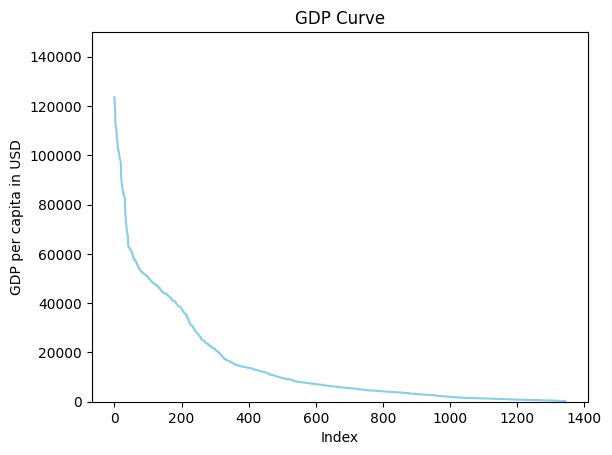

In [13]:

sorted_gdp = df_final["GDP"].sort_values(ascending=False)

# Plot GDP against index
plt.plot(df_final.index, sorted_gdp, color='skyblue')

# Add labels and title
plt.title('GDP Curve')
plt.xlabel('Index')
plt.ylabel('GDP per capita in USD')
plt.ylim(0, 150000)

# Display the plot
plt.show()


### Sorting GDP into 4 groups:

In [14]:
def add_gdp_groups_column(df):
    # Divide the data into four groups based on GDP quantiles
    df['GDP Group'] = pd.qcut(df['GDP'], q=4, labels=["Low", "Medium", "High", "Very High"])
    return df

df_final = add_gdp_groups_column(df_final)

# Get the GDP group for the USA

print(df_final[df_final['Country'] == 'United States']['GDP'].values[0])

group_counts = df_final.groupby('GDP Group')['Country'].count()
print(group_counts)

48466.6576026922
GDP Group
Low          334
Medium       333
High         333
Very High    333
Name: Country, dtype: int64


<ipython-input-14-cc57f956d344>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = df_final.groupby('GDP Group')['Country'].count()


In [15]:
# check to see if grouping makes sense

low_gdp_countries = df_final[df_final["GDP Group"] == "Low"]
low_gdp_countries.head(50)

print(max(low_gdp_countries["GDP"]))
print(min(low_gdp_countries["GDP"]))

1892.09400026444
234.235538877634


### Moving GDP Group column to desired position

In [16]:
# Popping the column for moving to another position:
column_to_move = df_final.pop("GDP Group")

# Inserting the popped column at the desired position
df_final.insert(5, "GDP Group", column_to_move)

df_final.head()

,Country,Code,Year,GDP,Air Pollution,GDP Group,Meningitis,Dementia,Parkinson s,Nutritional deficiency,...,Chronic kidney,Poisoning,Protein energy malnutrition,Road injury,Chronic respiratory,Chronic liver,Digestive disease,Fire,Acute hepatitis,Measles
0,Afghanistan,AFG,2010,543.306526,65.245592,Low,2410,1476,465,1974,...,4693,484,1932,7379,6969,3304,6367,451,2482,5750
1,Afghanistan,AFG,2011,591.190030,66.835727,Low,2327,1508,473,1846,...,4785,483,1805,7432,6916,3318,6370,448,2365,5715
2,Afghanistan,AFG,2012,638.845852,66.023174,Low,2254,1544,482,1705,...,4846,482,1667,7494,6878,3353,6398,445,2264,6006
3,Afghanistan,AFG,2013,624.315455,61.366745,Low,2281,1581,491,1690,...,4945,494,1651,8054,6859,3413,6476,460,2204,2786
4,Afghanistan,AFG,2014,614.223342,59.010330,Low,1935,1620,502,1617,...,5055,496,1579,8087,6851,3454,6522,463,2134,2252


# Working with Air Pollution data

### Air Pollution data visualization

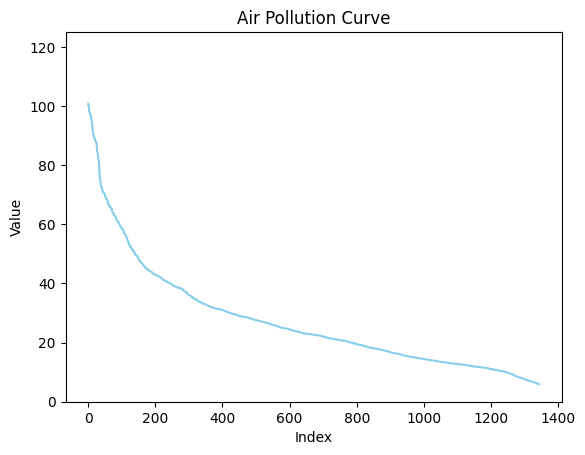

In [17]:
sorted_airpol = df_final["Air Pollution"].sort_values(ascending=False)

# Plot Air Pollution against index
plt.plot(df_final.index, sorted_airpol, color='skyblue')

# Add labels and title
plt.title('Air Pollution Curve')
plt.xlabel('Index')
plt.ylabel('Value')
plt.ylim(0, 125)

# Display the plot
plt.show()

### Sorting Air Pollution by 4 groups:

In [18]:
def add_airpol_groups_column(df):
    # Divide the data into four groups based on Air Pollution quantiles
    df['Air Pollution Group'] = pd.qcut(df['Air Pollution'], q=4, labels=["Low", "Medium", "High", "Very High"])
    return df

df_final = add_airpol_groups_column(df_final)

group_counts = df_final.groupby('Air Pollution Group')['Country'].count()
print(group_counts)

df_final.tail(20)

Air Pollution Group
Low          334
Medium       333
High         333
Very High    333
Name: Country, dtype: int64


<ipython-input-18-291628c32286>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = df_final.groupby('Air Pollution Group')['Country'].count()


,Country,Code,Year,GDP,Air Pollution,GDP Group,Meningitis,Dementia,Parkinson s,Nutritional deficiency,...,Poisoning,Protein energy malnutrition,Road injury,Chronic respiratory,Chronic liver,Digestive disease,Fire,Acute hepatitis,Measles,Air Pollution Group
1324,Vietnam,VNM,2014,2030.278447,34.896015,Medium,890,16671,3818,1158,...,908,121,25386,33943,19661,26579,585,728,562,Very High
1325,Vietnam,VNM,2015,2085.101349,32.466444,Medium,870,17223,3902,1093,...,918,113,25154,34289,20464,27510,592,719,149,High
1326,Vietnam,VNM,2016,2192.174482,30.241312,Medium,839,17827,3998,1029,...,925,106,24911,34806,21346,28557,611,711,137,High
1327,Vietnam,VNM,2017,2365.521615,29.626728,Medium,809,18405,4084,966,...,930,99,24648,35312,22272,29680,601,703,131,High
1328,Zambia,ZMB,2010,1489.459087,28.836379,Low,3138,512,152,2784,...,309,2709,2012,2082,3543,5198,327,286,1685,High
1329,Zambia,ZMB,2011,1672.907535,28.987117,Low,3109,534,157,2715,...,312,2641,2052,2124,3646,5332,331,285,1179,High
1330,Zambia,ZMB,2012,1763.069442,29.742040,Low,2992,556,161,2557,...,305,2485,2040,2131,3705,5393,325,278,1259,High
1331,Zambia,ZMB,2013,1878.346811,29.112221,Low,2396,579,165,2514,...,307,2443,2065,2153,3795,5512,328,276,286,High
1332,Zambia,ZMB,2014,1762.427817,28.493252,Low,2325,602,169,2388,...,306,2318,2104,2180,3904,5648,327,273,176,High
1333,Zambia,ZMB,2015,1338.290927,28.375452,Low,2256,626,173,2269,...,305,2199,2173,2214,4026,5804,326,270,207,High


### Moving Air Pollution Group onto desired position:

In [19]:
# Popping the column for moving to another position:
column_to_move = df_final.pop("Air Pollution Group")

# Inserting the popped column at the desired position
df_final.insert(6, "Air Pollution Group", column_to_move)

df_final.head(15)

,Country,Code,Year,GDP,Air Pollution,GDP Group,Air Pollution Group,Meningitis,Dementia,Parkinson s,...,Chronic kidney,Poisoning,Protein energy malnutrition,Road injury,Chronic respiratory,Chronic liver,Digestive disease,Fire,Acute hepatitis,Measles
0,Afghanistan,AFG,2010,543.306526,65.245592,Low,Very High,2410,1476,465,...,4693,484,1932,7379,6969,3304,6367,451,2482,5750
1,Afghanistan,AFG,2011,591.190030,66.835727,Low,Very High,2327,1508,473,...,4785,483,1805,7432,6916,3318,6370,448,2365,5715
2,Afghanistan,AFG,2012,638.845852,66.023174,Low,Very High,2254,1544,482,...,4846,482,1667,7494,6878,3353,6398,445,2264,6006
3,Afghanistan,AFG,2013,624.315455,61.366745,Low,Very High,2281,1581,491,...,4945,494,1651,8054,6859,3413,6476,460,2204,2786
4,Afghanistan,AFG,2014,614.223342,59.010330,Low,Very High,1935,1620,502,...,5055,496,1579,8087,6851,3454,6522,463,2134,2252
5,Afghanistan,AFG,2015,556.007221,61.252656,Low,Very High,1821,1652,511,...,5153,496,1469,7730,6835,3492,6555,463,2065,2573
6,Afghanistan,AFG,2016,512.012778,56.287047,Low,Very High,1795,1690,524,...,5296,504,1416,7866,6894,3578,6673,471,2044,1682
7,Afghanistan,AFG,2017,516.679862,56.910808,Low,Very High,1665,1728,537,...,5419,512,1332,8013,6982,3693,6841,476,2046,1695
8,Albania,ALB,2010,4094.348386,21.277828,Medium,Medium,16,616,166,...,247,12,4,252,587,280,436,16,1,0
9,Albania,ALB,2011,4437.142612,22.772537,Medium,High,13,647,176,...,257,12,4,255,616,288,450,16,1,0


# Working with Cause of Death data

<ipython-input-20-4449afec3149>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deaths_grouped_by_gdp = deaths_total.groupby("GDP Group").sum()


           Meningitis  Dementia  Parkinson s  Nutritional deficiency  Malaria  \
GDP Group                                                                       
Low           1339238   1134581       387901                 1315492  3095757   
Medium         631416   1434387       386963                  415080  2014406   
High           122716   2969635       699561                  285301    12545   
Very High       28540   4237682       798066                  117070     4582   

           Drowning  Interpersonal violence  Maternal disorder  HIV/AIDS  \
GDP Group                                                                  
Low          800061                  799473            1133010   4794574   
Medium       451389                  640412             347916   1484346   
High         561858                 1253348              78927   1912944   
Very High    136714                  200028              14780    117146   

           Drug disorder  ...  Chronic kidney  Poisoning

<Figure size 1200x800 with 0 Axes>

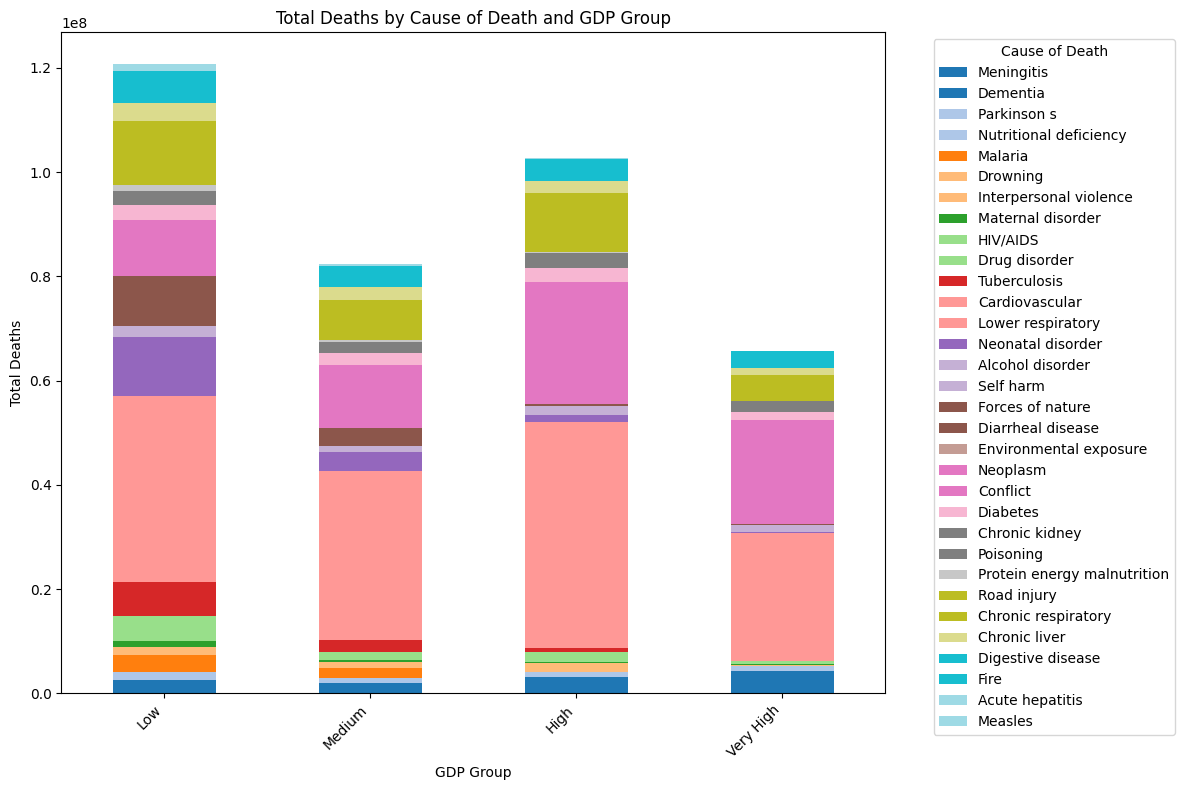

In [20]:
# Add the GDP groups column
df_final = add_gdp_groups_column(df_final)

# Select relevant columns (assuming death counts start from the 8th column onward)
deaths_total = df_final.iloc[:, 7:]

# Insert the GDP groups column
deaths_total.insert(0, "GDP Group", df_final["GDP Group"])

# Group by GDP Group and sum the death counts
deaths_grouped_by_gdp = deaths_total.groupby("GDP Group").sum()

# Display the grouped data (optional)
print(deaths_grouped_by_gdp.head())


# Plot stacked bar chart
plt.figure(figsize=(12, 8))
deaths_grouped_by_gdp.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 8))

plt.xlabel('GDP Group')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Cause of Death and GDP Group')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


# Cleaning final dataset pt. 2 + transformation



In [21]:
# removing unnecessary columns
 # we decided to drop the causes of death that will probably not show any dependence on country

columns_to_drop = [7, 1, 12, 13, 14, 16, 21, 22, 23, 25, 27, 28, 29, 30, 32, 34, 36, 37, 38]

df_final.drop(df_final.columns[columns_to_drop], axis=1, inplace=True)

In [22]:
df_final.head()

# recalculating the death counts to % of total deaths by listed causes in that country and year

def calculate_percentage(row):
    row_sum = row.sum()
    return (row / row_sum) * 100

df_final_abs = df_final.copy() # saving for later use

df_final[df_final.columns[6:]] = df_final_abs[df_final_abs.columns[6:]].apply(calculate_percentage, axis=1)
df_final.head()


,Country,Year,GDP,Air Pollution,GDP Group,Air Pollution Group,Dementia,Parkinson s,Nutritional deficiency,Malaria,HIV/AIDS,Tuberculosis,Cardiovascular,Lower respiratory,Neonatal disorder,Diarrheal disease,Neoplasm,Protein energy malnutrition,Chronic respiratory,Digestive disease
0,Afghanistan,2010,543.306526,65.245592,Low,Very High,0.989177,0.311631,1.322923,0.252656,0.117951,2.959488,36.145160,15.883792,15.964213,4.616828,11.203967,1.294776,4.670442,4.266997
1,Afghanistan,2011,591.190030,66.835727,Low,Very High,1.015912,0.318652,1.243617,0.262736,0.123957,2.869211,36.612592,15.415864,16.135356,4.319649,11.515919,1.215996,4.659184,4.291354
2,Afghanistan,2012,638.845852,66.023174,Low,Very High,1.045376,0.326342,1.154383,0.063643,0.129318,2.790830,37.148777,15.004943,16.287966,4.067760,11.863397,1.128654,4.656800,4.331812
3,Afghanistan,2013,624.315455,61.366745,Low,Very High,1.061737,0.329736,1.134937,0.096033,0.134312,2.717804,37.119813,14.948928,16.274587,4.019959,12.098155,1.108746,4.606231,4.349023
4,Afghanistan,2014,614.223342,59.010330,Low,Very High,1.086082,0.336551,1.084071,0.152856,0.142800,2.661571,37.497989,14.581657,16.199383,3.855591,12.377313,1.058595,4.593054,4.372486


In [23]:
# Shapiro test
# p value of less than .05 - rejection of null hypothesis (data not normally distributed)

df_numeric = df_final.select_dtypes(include=["number"])

results = {}

for column in df_numeric.columns:
    stat, p_value = shapiro(df_numeric[column])
    results[column] = {'Statistic': stat, 'p-value': p_value}

results_df = pd.DataFrame(results).T
print(results_df)

# all columns (except year where it doesn't make sense) need to be transformed to a normal distribution for some methods


                             Statistic       p-value
Year                          0.925787  3.889165e-25
GDP                           0.695004  8.288265e-44
Air Pollution                 0.849756  8.872545e-34
Dementia                      0.919797  5.066164e-26
Parkinson s                   0.960943  1.936084e-18
Nutritional deficiency        0.703532  2.219926e-43
Malaria                       0.496958  1.025408e-51
HIV/AIDS                      0.532833  1.670834e-50
Tuberculosis                  0.772137  1.632827e-39
Cardiovascular                0.967830  1.237229e-16
Lower respiratory             0.934251  8.676486e-24
Neonatal disorder             0.859282  6.416204e-33
Diarrheal disease             0.700958  1.644843e-43
Neoplasm                      0.954604  6.568035e-20
Protein energy malnutrition   0.691460  5.540948e-44
Chronic respiratory           0.858347  5.260149e-33
Digestive disease             0.887633  4.679111e-30


In [24]:
# prepare data frame for transformation
df_final_norm = df_final.copy()
columns_to_drop = [0, 1, 4, 5]
df_final_norm.drop(df_final_norm.columns[columns_to_drop], axis=1, inplace=True)

df_final_norm.head()

,GDP,Air Pollution,Dementia,Parkinson s,Nutritional deficiency,Malaria,HIV/AIDS,Tuberculosis,Cardiovascular,Lower respiratory,Neonatal disorder,Diarrheal disease,Neoplasm,Protein energy malnutrition,Chronic respiratory,Digestive disease
0,543.306526,65.245592,0.989177,0.311631,1.322923,0.252656,0.117951,2.959488,36.145160,15.883792,15.964213,4.616828,11.203967,1.294776,4.670442,4.266997
1,591.190030,66.835727,1.015912,0.318652,1.243617,0.262736,0.123957,2.869211,36.612592,15.415864,16.135356,4.319649,11.515919,1.215996,4.659184,4.291354
2,638.845852,66.023174,1.045376,0.326342,1.154383,0.063643,0.129318,2.790830,37.148777,15.004943,16.287966,4.067760,11.863397,1.128654,4.656800,4.331812
3,624.315455,61.366745,1.061737,0.329736,1.134937,0.096033,0.134312,2.717804,37.119813,14.948928,16.274587,4.019959,12.098155,1.108746,4.606231,4.349023
4,614.223342,59.010330,1.086082,0.336551,1.084071,0.152856,0.142800,2.661571,37.497989,14.581657,16.199383,3.855591,12.377313,1.058595,4.593054,4.372486


In [25]:
# Yeo-Johnson transformation (can't use Box-Cox because data set contains zero values)

for column in df_final_norm.columns:
    try:
        df_final_norm[column], _ = yeojohnson(df_final_norm[column])
    except Exception as e:
        print(f"Error processing column {column}: {e}")

df_final_norm.head()

,GDP,Air Pollution,Dementia,Parkinson s,Nutritional deficiency,Malaria,HIV/AIDS,Tuberculosis,Cardiovascular,Lower respiratory,Neonatal disorder,Diarrheal disease,Neoplasm,Protein energy malnutrition,Chronic respiratory,Digestive disease
0,6.293377,3.077413,0.694424,0.278003,0.520655,0.186418,0.107068,0.947382,30.354814,3.751726,2.730482,1.048409,5.678917,0.502137,1.357656,1.060441
1,6.377527,3.089719,0.708038,0.283612,0.508296,0.191800,0.111997,0.936946,30.724477,3.703528,2.739814,1.029922,5.788846,0.490328,1.356466,1.062176
2,6.454773,3.083472,0.722841,0.289727,0.493160,0.058509,0.116357,0.927567,31.148145,3.660277,2.748055,1.012878,5.909966,0.476034,1.356213,1.065029
3,6.431847,3.045904,0.730970,0.292416,0.489672,0.084767,0.120387,0.918548,31.125270,3.654312,2.747336,1.009487,5.991028,0.472582,1.350824,1.066232
4,6.415609,3.025635,0.742953,0.297800,0.480200,0.126031,0.127166,0.911411,31.423869,3.614776,2.743281,0.997410,6.086640,0.463540,1.349410,1.067863


In [26]:
# repeat Shapiro test for transformed data
# p value of less than .05 - rejection of null hypothesis (data not normally distributed)

results = {}

for column in df_final_norm.columns:
    stat, p_value = shapiro(df_final_norm[column])
    results[column] = {'Statistic': stat, 'p-value': p_value}

results_df = pd.DataFrame(results).T
print(results_df)

# data is still not normally distributed but not much more can be done

                             Statistic       p-value
GDP                           0.979957  1.180801e-12
Air Pollution                 0.993341  1.064528e-05
Dementia                      0.958369  4.686446e-19
Parkinson s                   0.963704  9.577717e-18
Nutritional deficiency        0.921331  8.441127e-26
Malaria                       0.599103  4.807494e-48
HIV/AIDS                      0.897199  5.815173e-29
Tuberculosis                  0.895154  3.343033e-29
Cardiovascular                0.966484  5.239657e-17
Lower respiratory             0.981584  5.260522e-12
Neonatal disorder             0.926259  4.591630e-25
Diarrheal disease             0.907048  9.494750e-28
Neoplasm                      0.958215  4.314408e-19
Protein energy malnutrition   0.907567  1.106897e-27
Chronic respiratory           0.985204  2.040188e-10
Digestive disease             0.993643  1.776657e-05


In [27]:
# new transformed version of df_final:
df_norm = df_final.copy()
common_columns = df_norm.columns.intersection(df_final_norm.columns)
df_norm[common_columns] = df_final_norm[common_columns]
df_norm.head()

,Country,Year,GDP,Air Pollution,GDP Group,Air Pollution Group,Dementia,Parkinson s,Nutritional deficiency,Malaria,HIV/AIDS,Tuberculosis,Cardiovascular,Lower respiratory,Neonatal disorder,Diarrheal disease,Neoplasm,Protein energy malnutrition,Chronic respiratory,Digestive disease
0,Afghanistan,2010,6.293377,3.077413,Low,Very High,0.694424,0.278003,0.520655,0.186418,0.107068,0.947382,30.354814,3.751726,2.730482,1.048409,5.678917,0.502137,1.357656,1.060441
1,Afghanistan,2011,6.377527,3.089719,Low,Very High,0.708038,0.283612,0.508296,0.191800,0.111997,0.936946,30.724477,3.703528,2.739814,1.029922,5.788846,0.490328,1.356466,1.062176
2,Afghanistan,2012,6.454773,3.083472,Low,Very High,0.722841,0.289727,0.493160,0.058509,0.116357,0.927567,31.148145,3.660277,2.748055,1.012878,5.909966,0.476034,1.356213,1.065029
3,Afghanistan,2013,6.431847,3.045904,Low,Very High,0.730970,0.292416,0.489672,0.084767,0.120387,0.918548,31.125270,3.654312,2.747336,1.009487,5.991028,0.472582,1.350824,1.066232
4,Afghanistan,2014,6.415609,3.025635,Low,Very High,0.742953,0.297800,0.480200,0.126031,0.127166,0.911411,31.423869,3.614776,2.743281,0.997410,6.086640,0.463540,1.349410,1.067863


# Data visualisation & correlation between features

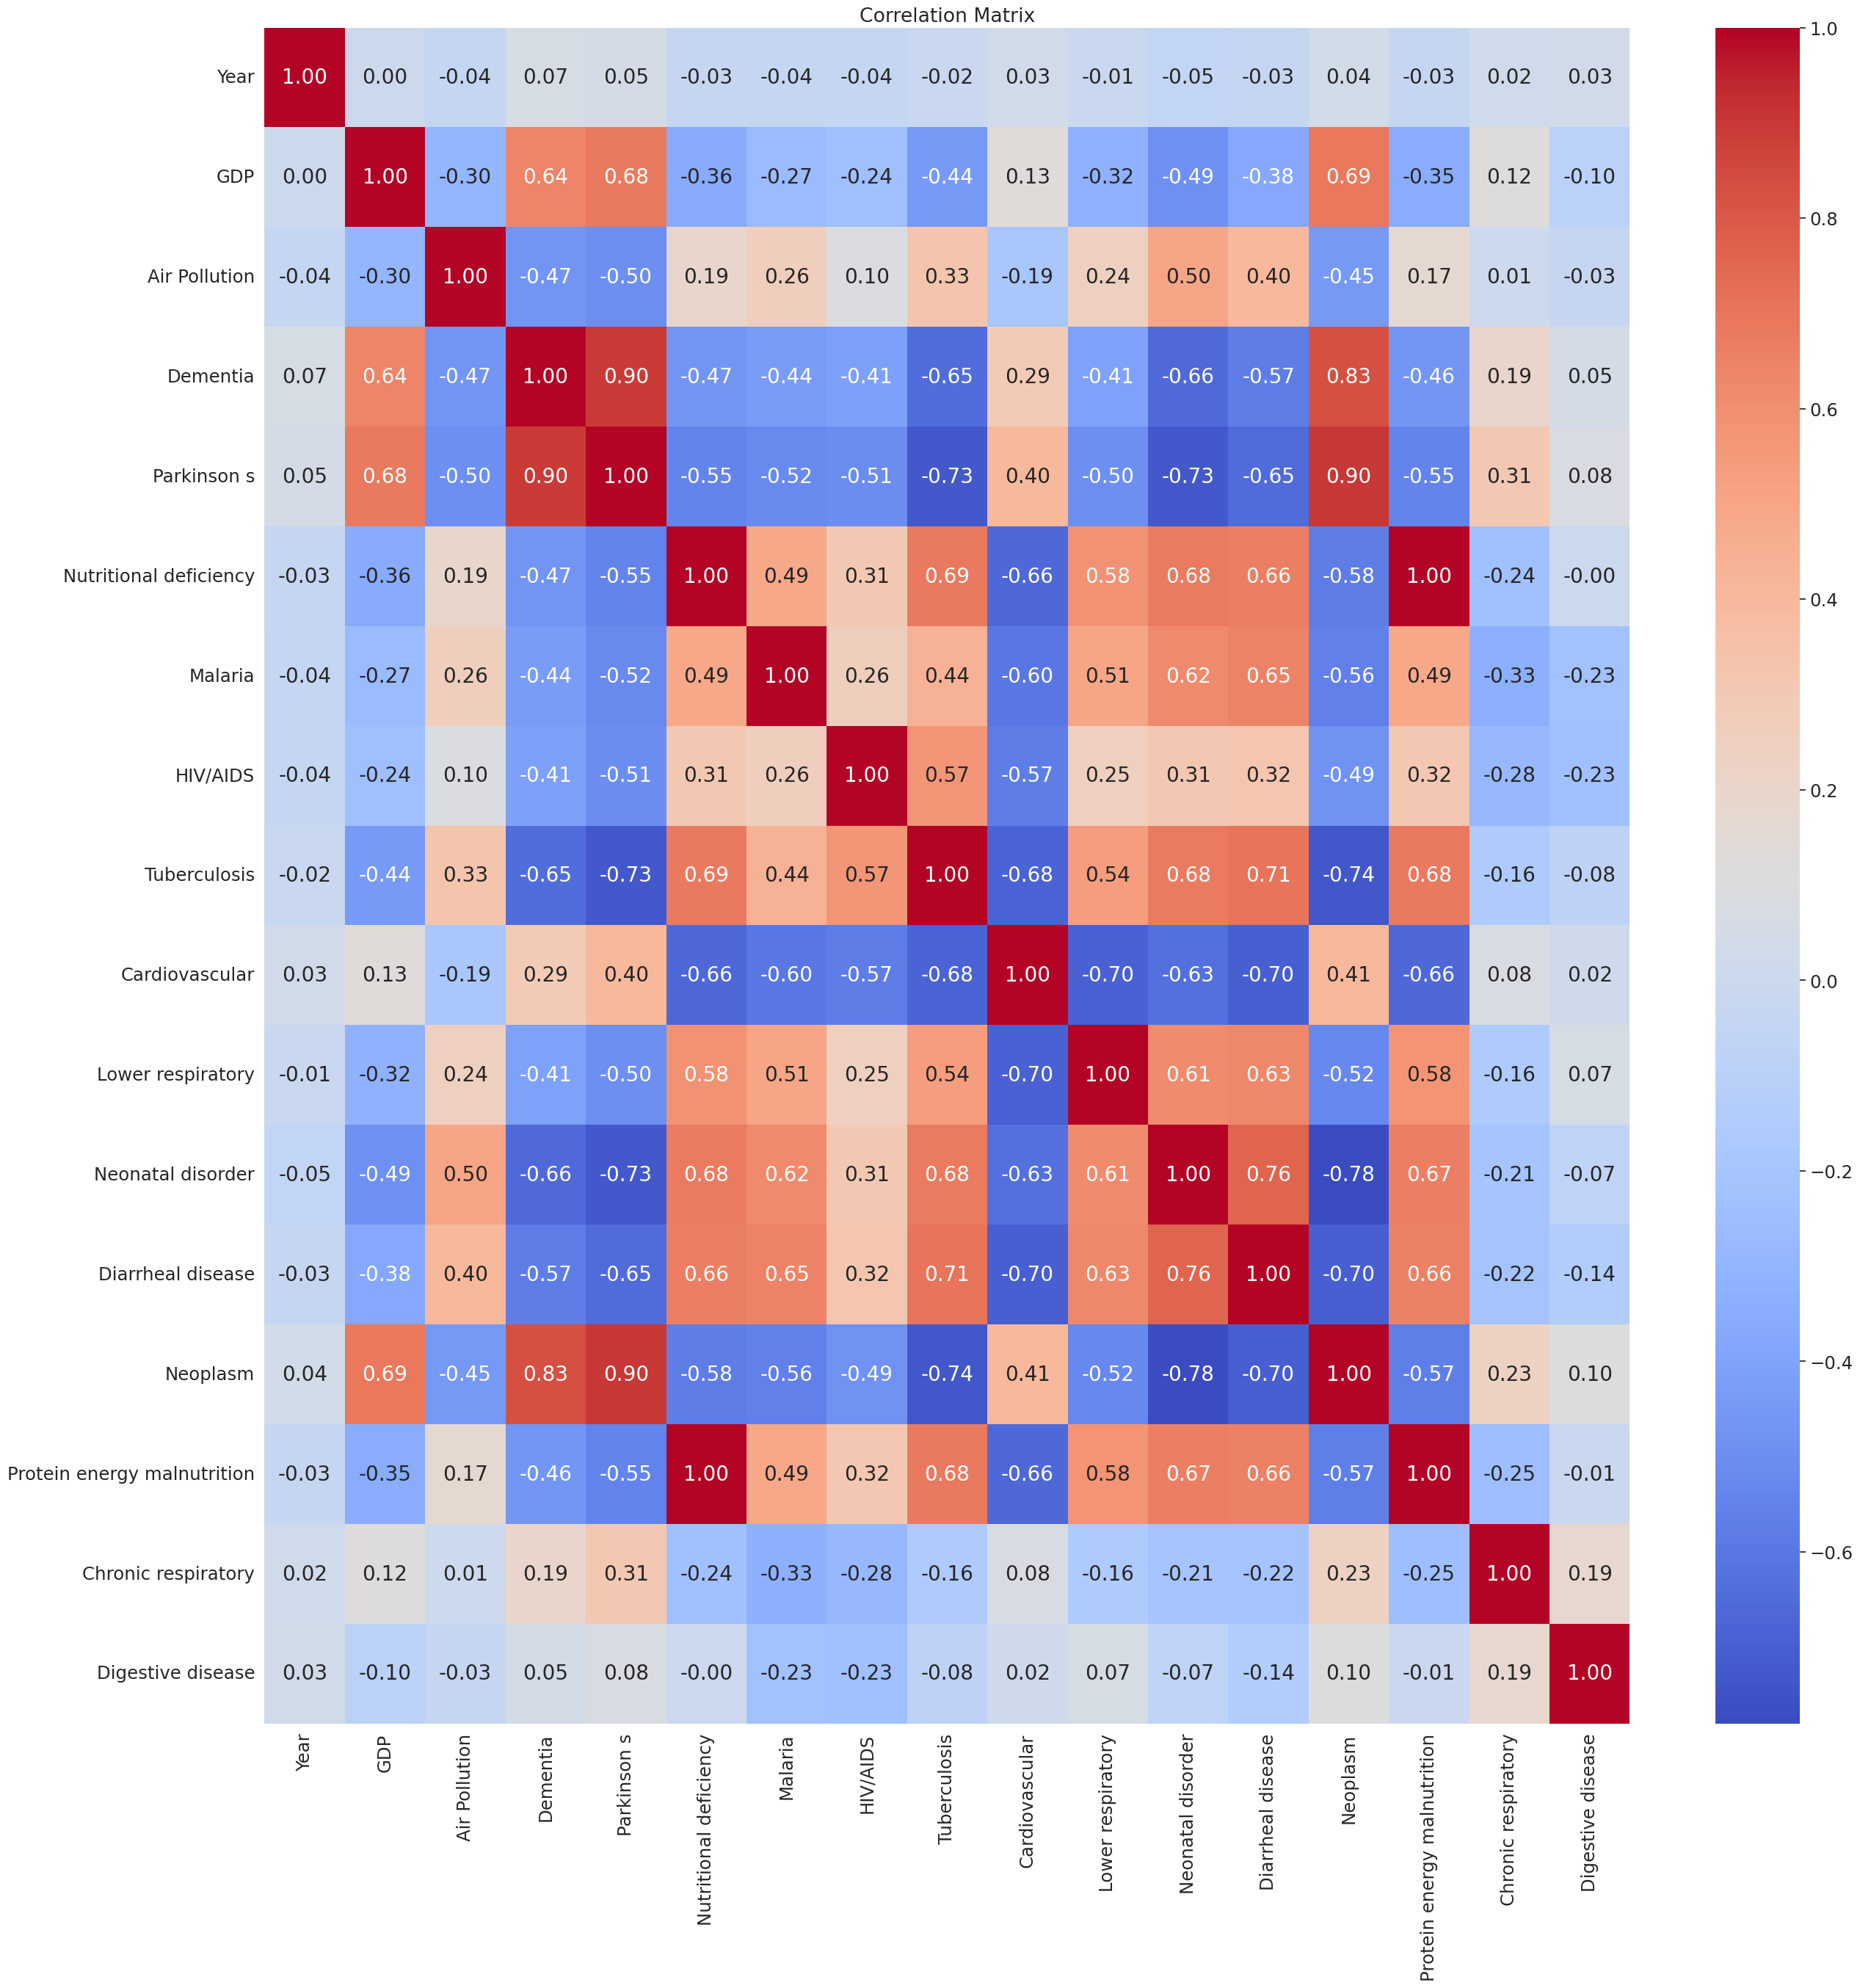

In [28]:
# Corr matrix

correlation_matrix = df_numeric.corr()

sns.set(font_scale=1.6) # bigger labels
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 20})
# Annot=True shows values in the cells
# fmt=.2f shows numbers with only two decimal places
# annot_kws - size of the text inside the cell

plt.title("Correlation Matrix")
plt.show()

sns.set(font_scale=1) # reset


In [29]:
# Based on the correlation matrix, Year has very little effect so
# it might be better to work with a reduced dataset.

# this will be done by dropping the Year column and averaging all values
# for a given country to form 2 new dataframes, df_final_reduced and df_norm_reduced:

# in case of the country being sorted in two separate AP/GDP groups, both entries stay with values replaced by the mean

df = df_final.copy()
columns_to_drop = [1, 4, 5]
df.drop(df.columns[columns_to_drop], axis=1, inplace=True)
df = df.groupby('Country').mean().reset_index()

df_final_reduced = pd.merge(df, df_final[['Country', 'GDP Group', 'Air Pollution Group']].drop_duplicates(), on='Country')

df_final_reduced.head()

,Country,GDP,Air Pollution,Dementia,Parkinson s,Nutritional deficiency,Malaria,HIV/AIDS,Tuberculosis,Cardiovascular,Lower respiratory,Neonatal disorder,Diarrheal disease,Neoplasm,Protein energy malnutrition,Chronic respiratory,Digestive disease,GDP Group,Air Pollution Group
0,Afghanistan,574.572633,61.616510,1.070649,0.333354,1.101591,0.192318,0.143525,2.706286,37.542343,14.584954,16.074093,3.956159,12.233687,1.076061,4.617574,4.367407,Low,Very High
1,Albania,4297.336695,19.919271,4.058626,1.121001,0.028098,0.000000,0.011239,0.061028,61.836118,2.200108,1.348920,0.039338,22.780832,0.022479,3.824319,2.667893,Medium,Medium
2,Albania,4297.336695,19.919271,4.058626,1.121001,0.028098,0.000000,0.011239,0.061028,61.836118,2.200108,1.348920,0.039338,22.780832,0.022479,3.824319,2.667893,Medium,High
3,Algeria,4844.421258,35.684048,2.938192,0.743877,0.086927,0.000000,0.240018,0.351549,59.753651,3.973673,8.402917,0.422377,14.327029,0.072944,4.691503,3.995342,Medium,High
4,Algeria,4844.421258,35.684048,2.938192,0.743877,0.086927,0.000000,0.240018,0.351549,59.753651,3.973673,8.402917,0.422377,14.327029,0.072944,4.691503,3.995342,Medium,Very High


In [30]:
df = df_norm.copy()
columns_to_drop = [1, 4, 5]
df.drop(df.columns[columns_to_drop], axis=1, inplace=True)
df = df.groupby('Country').mean().reset_index()

df_norm_reduced = pd.merge(df, df_norm[['Country', 'GDP Group', 'Air Pollution Group']].drop_duplicates(), on='Country')

In [31]:
# Pairplot of reduced df_norm - all (colored by GDP)

#print(list(df_final.columns))

#cols_to_plot = ['GDP', 'Air Pollution', 'GDP Group', 'Dementia', 'Parkinson s', 'Nutritional deficiency', 'Malaria', 'HIV/AIDS', 'Tuberculosis', 'Cardiovascular', 'Lower respiratory', 'Neonatal disorder', 'Diarrheal disease', 'Neoplasm', 'Protein energy malnutrition', 'Chronic respiratory', 'Digestive disease']
#sns_matrix = sns.pairplot(df_norm_reduced[cols_to_plot], hue='GDP Group')
#sns_matrix.fig.subplots_adjust(top=.9)
#sns_matrix.fig.suptitle("Matrix plot for all combinations")

# comment out if not needed because it takes ages to compute

In [32]:
# Pairplot of reduced df_norm - all (colored by AP)
#cols_to_plot = ['GDP', 'Air Pollution', 'Air Pollution Group', 'Dementia', 'Parkinson s', 'Nutritional deficiency', 'Malaria', 'HIV/AIDS', 'Tuberculosis', 'Cardiovascular', 'Lower respiratory', 'Neonatal disorder', 'Diarrheal disease', 'Neoplasm', 'Protein energy malnutrition', 'Chronic respiratory', 'Digestive disease']
#sns_matrix = sns.pairplot(df_norm_reduced[cols_to_plot], hue='Air Pollution Group')
#sns_matrix.fig.subplots_adjust(top=.9)
#sns_matrix.fig.suptitle("Matrix plot for all combinations")

# PCA

In [33]:

# Data Preprocessing

# Selecting columns with data and scaling
df_pca = df_norm_reduced.drop(columns=['GDP Group', 'Air Pollution Group'])

X = df_pca.iloc[:, 1:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Explained variance (Top 5 PCs): [0.59579549 0.12948916 0.06929291 0.04766597 0.03884969]
Cumulative variance (Top 5 PCs): [0.59579549 0.72528464 0.79457755 0.84224353 0.88109322]


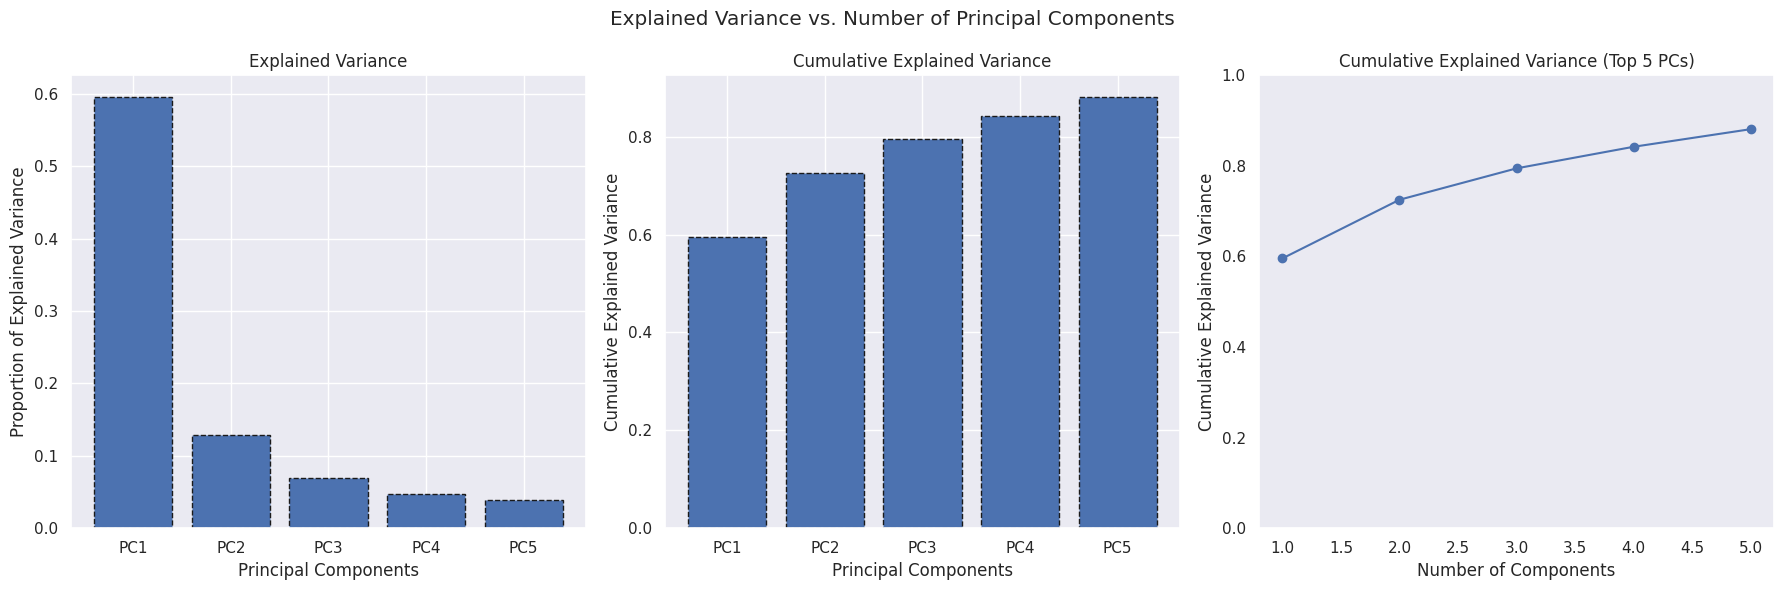

In [34]:
# Perform PCA
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Define the number of top PCs to visualize
top_n = 5

# Only consider the first top_n PCs
explained_variance_top_n = explained_variance[:top_n]
cumulative_variance_top_n = cumulative_variance[:top_n]

print("Explained variance (Top 5 PCs):", explained_variance_top_n)
print("Cumulative variance (Top 5 PCs):", cumulative_variance_top_n)

# Explained variance - graph
fig_var = plt.figure(figsize=(18, 6))
fig_var.suptitle("Explained Variance vs. Number of Principal Components")

# Plot for Explained Variance (Top 5 PCs)
ax_var = plt.subplot(131)
ax_var.bar([f'PC{i+1}' for i in range(top_n)], explained_variance_top_n, edgecolor="k", linestyle="--")
ax_var.set_ylabel('Proportion of Explained Variance')
ax_var.set_xlabel('Principal Components')
ax_var.set_title('Explained Variance')

# Plot for Cumulative Explained Variance (Top 5 PCs)
ax_cumvar = plt.subplot(132)
ax_cumvar.bar([f'PC{i+1}' for i in range(top_n)], cumulative_variance_top_n, edgecolor="k", linestyle="--")
ax_cumvar.set_ylabel('Cumulative Explained Variance')
ax_cumvar.set_xlabel('Principal Components')
ax_cumvar.set_title('Cumulative Explained Variance')

# Plot for Cumulative Explained Variance across all components
ax_all = plt.subplot(133)
xpoints = np.arange(1, top_n + 1)
ypoints = cumulative_variance[:top_n]
ax_all.plot(xpoints, ypoints, marker='o')
ax_all.grid()
ax_all.set_ylim([0, 1])
ax_all.set_xlabel('Number of Components')
ax_all.set_ylabel('Cumulative Explained Variance')
ax_all.set_title('Cumulative Explained Variance (Top 5 PCs)')

plt.tight_layout()
plt.show()

# Select 3 components (or the top_n you prefer) for further analysis
n_components = 3  # Change this if you want a different number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [35]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df = pd.concat([pca_df, df_norm_reduced[['Air Pollution Group', 'GDP Group']]], axis=1)
pca_df.head()

,PC1,PC2,PC3,Air Pollution Group,GDP Group
0,3.235572,-0.709356,1.283339,Very High,Low
1,-3.058031,-2.040102,-0.959802,Medium,Medium
2,-3.058031,-2.040102,-0.959802,High,Medium
3,-1.126745,-1.813111,0.735031,High,Medium
4,-1.126745,-1.813111,0.735031,Very High,Medium


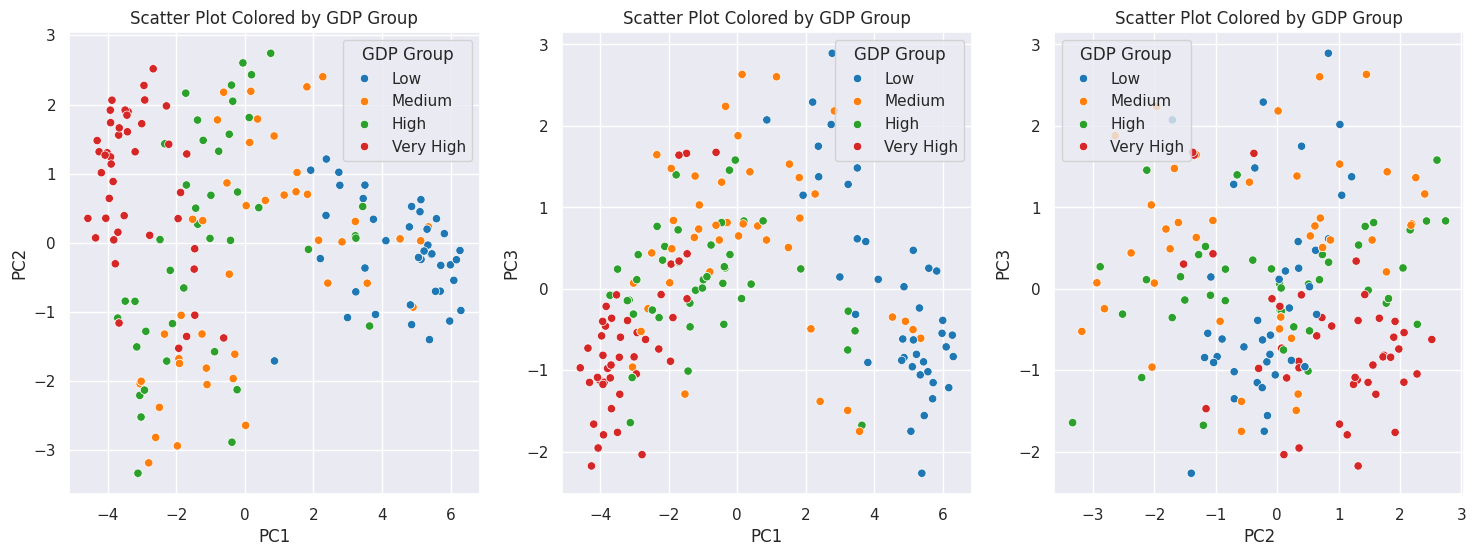

In [36]:
# Visualization of results
fig_pca = plt.figure(figsize=(18, 6))

plt.subplot(131)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='GDP Group', palette='tab10')
plt.title('Scatter Plot Colored by GDP Group')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='GDP Group')

plt.subplot(132)
sns.scatterplot(data=pca_df, x='PC1', y='PC3', hue='GDP Group', palette='tab10')
plt.title('Scatter Plot Colored by GDP Group')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.legend(title='GDP Group')

plt.subplot(133)
sns.scatterplot(data=pca_df, x='PC2', y='PC3', hue='GDP Group', palette='tab10')
plt.title('Scatter Plot Colored by GDP Group')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.legend(title='GDP Group')
plt.show()


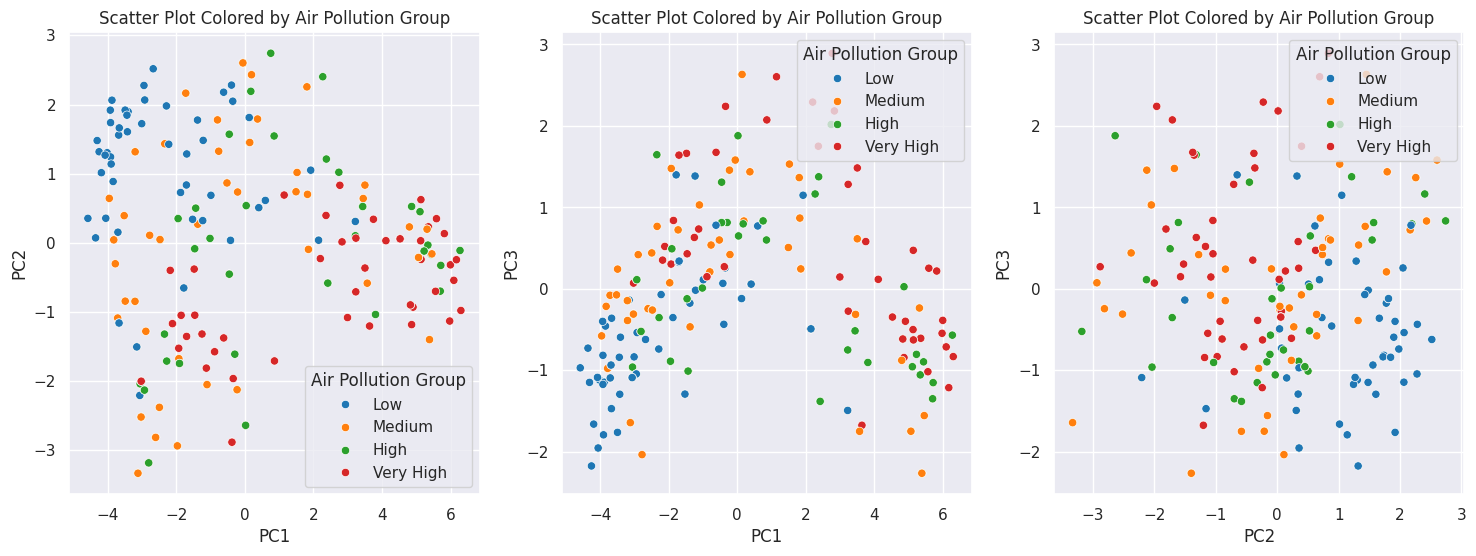

In [37]:
# Visualization of results
fig_pca = plt.figure(figsize=(18, 6))

plt.subplot(131)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Air Pollution Group', palette='tab10')
plt.title('Scatter Plot Colored by Air Pollution Group')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Air Pollution Group')

plt.subplot(132)
sns.scatterplot(data=pca_df, x='PC1', y='PC3', hue='Air Pollution Group', palette='tab10')
plt.title('Scatter Plot Colored by Air Pollution Group')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.legend(title='Air Pollution Group')

plt.subplot(133)
sns.scatterplot(data=pca_df, x='PC2', y='PC3', hue='Air Pollution Group', palette='tab10')
plt.title('Scatter Plot Colored by Air Pollution Group')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.legend(title='Air Pollution Group')
plt.show()

In [38]:
loadings = pca.components_.T # a measure of how much each variable contributes to the principal component

features = (list(df_pca.columns)[1:])
loadings_df = pd.DataFrame(loadings, index=features, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

print(loadings_df)

                                  PC1       PC2       PC3
GDP                         -0.267809  0.163611 -0.219228
Air Pollution                0.161965 -0.296189  0.363081
Dementia                    -0.268924  0.265042 -0.088146
Parkinson s                 -0.278215  0.294672 -0.060725
Nutritional deficiency       0.274940  0.290808 -0.054613
Malaria                      0.275541 -0.038289 -0.253344
HIV/AIDS                     0.248422  0.116391 -0.206588
Tuberculosis                 0.296345 -0.017146  0.156619
Cardiovascular              -0.237954 -0.316930  0.287086
Lower respiratory            0.240786  0.257133 -0.027787
Neonatal disorder            0.291470 -0.012495  0.184314
Diarrheal disease            0.294344  0.167731 -0.011587
Neoplasm                    -0.287266  0.237081 -0.072636
Protein energy malnutrition  0.271915  0.295377 -0.088015
Chronic respiratory         -0.091464  0.415298  0.329051
Digestive disease           -0.015955  0.343175  0.660066


# Logistic Regression


## Predicting GDP

In [39]:
# an attempt to predict the GDP of a country based on cause of death data

# label encoding: Low = 1 to Very High = 4
# not using transformed data (at least not a priori)

df_logreg = df_final_reduced.copy()
columns_to_drop = [1,2,18]
df_logreg.drop(df_logreg.columns[columns_to_drop], axis=1, inplace=True)

category_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
label_encoder = LabelEncoder()
df_logreg['GDP Group'] = label_encoder.fit_transform(df_logreg['GDP Group'].map(category_mapping)) + 1

df_logreg.head()

,Country,Dementia,Parkinson s,Nutritional deficiency,Malaria,HIV/AIDS,Tuberculosis,Cardiovascular,Lower respiratory,Neonatal disorder,Diarrheal disease,Neoplasm,Protein energy malnutrition,Chronic respiratory,Digestive disease,GDP Group
0,Afghanistan,1.070649,0.333354,1.101591,0.192318,0.143525,2.706286,37.542343,14.584954,16.074093,3.956159,12.233687,1.076061,4.617574,4.367407,1
1,Albania,4.058626,1.121001,0.028098,0.000000,0.011239,0.061028,61.836118,2.200108,1.348920,0.039338,22.780832,0.022479,3.824319,2.667893,2
2,Albania,4.058626,1.121001,0.028098,0.000000,0.011239,0.061028,61.836118,2.200108,1.348920,0.039338,22.780832,0.022479,3.824319,2.667893,2
3,Algeria,2.938192,0.743877,0.086927,0.000000,0.240018,0.351549,59.753651,3.973673,8.402917,0.422377,14.327029,0.072944,4.691503,3.995342,2
4,Algeria,2.938192,0.743877,0.086927,0.000000,0.240018,0.351549,59.753651,3.973673,8.402917,0.422377,14.327029,0.072944,4.691503,3.995342,2


In [40]:
y_col = 'GDP Group'
x_cols = df_logreg.columns.to_list()
x_cols.remove(y_col)
x_cols.remove('Country')
x_cols

X = df_logreg[x_cols]
y = df_logreg[y_col]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=5)

In [41]:
logreg_ovr = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=10000) # one vs rest approach
logreg_ovr.fit(x_train, y_train)

logreg_mult = LogisticRegression(multi_class='multinomial', max_iter=10000) # one vs rest approach
logreg_mult.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='multinomial')

In [42]:
y_pred_ovr = logreg_ovr.predict(x_test)
accuracy_score(y_pred_ovr, y_test)

0.5283018867924528

In [43]:

y_pred_mult = logreg_mult.predict(x_test)
accuracy_score(y_pred_mult, y_test)

0.5849056603773585

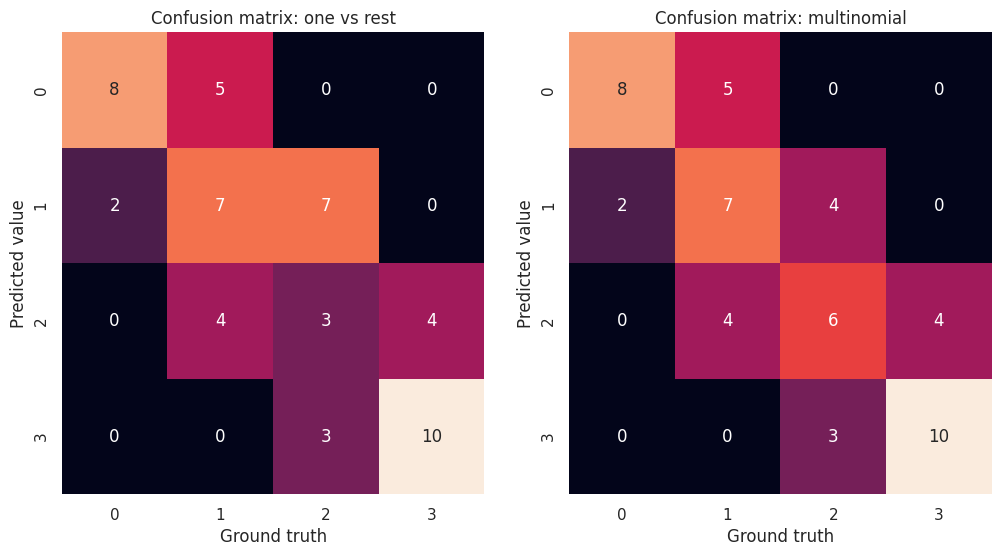

In [44]:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(121)
s = sns.heatmap(confusion_matrix(y_pred_ovr, y_test), cbar=False, annot=True,
                fmt="0", ax=ax)
s.set(xlabel='Ground truth', ylabel='Predicted value', title="Confusion matrix: one vs rest")

ax = plt.subplot(122)
s = sns.heatmap(confusion_matrix(y_pred_mult, y_test), cbar=False, annot=True,
                fmt="0", ax=ax)
s.set(xlabel='Ground truth', ylabel='Predicted value', title="Confusion matrix: multinomial")
plt.show()

## Predicting Air Pollution

In [45]:
df_logreg = df_final_reduced.copy()
columns_to_drop = [1,2,17]
df_logreg.drop(df_logreg.columns[columns_to_drop], axis=1, inplace=True)

category_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
label_encoder = LabelEncoder()
df_logreg['Air Pollution Group'] = label_encoder.fit_transform(df_logreg['Air Pollution Group'].map(category_mapping)) + 1



df_logreg.head()

,Country,Dementia,Parkinson s,Nutritional deficiency,Malaria,HIV/AIDS,Tuberculosis,Cardiovascular,Lower respiratory,Neonatal disorder,Diarrheal disease,Neoplasm,Protein energy malnutrition,Chronic respiratory,Digestive disease,Air Pollution Group
0,Afghanistan,1.070649,0.333354,1.101591,0.192318,0.143525,2.706286,37.542343,14.584954,16.074093,3.956159,12.233687,1.076061,4.617574,4.367407,4
1,Albania,4.058626,1.121001,0.028098,0.000000,0.011239,0.061028,61.836118,2.200108,1.348920,0.039338,22.780832,0.022479,3.824319,2.667893,2
2,Albania,4.058626,1.121001,0.028098,0.000000,0.011239,0.061028,61.836118,2.200108,1.348920,0.039338,22.780832,0.022479,3.824319,2.667893,3
3,Algeria,2.938192,0.743877,0.086927,0.000000,0.240018,0.351549,59.753651,3.973673,8.402917,0.422377,14.327029,0.072944,4.691503,3.995342,3
4,Algeria,2.938192,0.743877,0.086927,0.000000,0.240018,0.351549,59.753651,3.973673,8.402917,0.422377,14.327029,0.072944,4.691503,3.995342,4


In [46]:
y_col = 'Air Pollution Group'
x_cols = df_logreg.columns.to_list()
x_cols.remove(y_col)
x_cols.remove('Country')
x_cols

X = df_logreg[x_cols]
y = df_logreg[y_col]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=5)

In [47]:
logreg_ovr = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=10000) # one vs rest approach
logreg_ovr.fit(x_train, y_train)

logreg_mult = LogisticRegression(multi_class='multinomial', max_iter=10000) # one vs rest approach
logreg_mult.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='multinomial')

In [48]:
y_pred_ovr = logreg_ovr.predict(x_test)
accuracy_score(y_pred_ovr, y_test)

0.49056603773584906

In [49]:
y_pred_mult = logreg_mult.predict(x_test)
accuracy_score(y_pred_mult, y_test)

0.49056603773584906

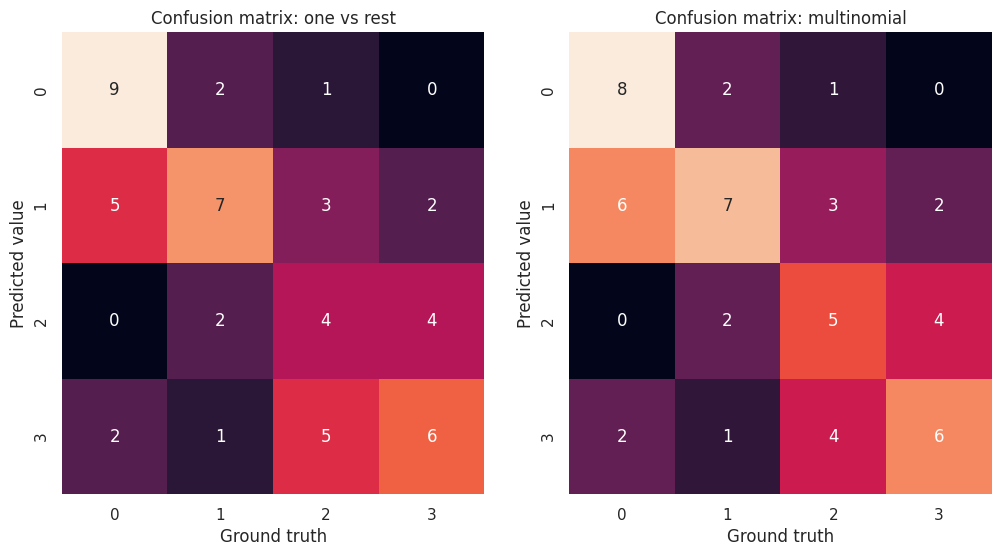

In [50]:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(121)
s = sns.heatmap(confusion_matrix(y_pred_ovr, y_test), cbar=False, annot=True,
                fmt="0", ax=ax)
s.set(xlabel='Ground truth', ylabel='Predicted value', title="Confusion matrix: one vs rest")

ax = plt.subplot(122)
s = sns.heatmap(confusion_matrix(y_pred_mult, y_test), cbar=False, annot=True,
                fmt="0", ax=ax)
s.set(xlabel='Ground truth', ylabel='Predicted value', title="Confusion matrix: multinomial")
plt.show()

# Random forest

### Predicting GDP Group

In [51]:
df_randomforest = df_final_reduced.copy()

# Initialize label encoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['GDP Group']

# Encode each categorical column
for col in categorical_columns:
    df_randomforest[col] = label_encoder.fit_transform(df_randomforest[col])

# Assuming 'GDP Group' is the target variable and the rest are features
# Dropping Country and Air Pollution to ensure that GDP is only predicted based on causes of death
X = df_randomforest.drop(columns=['Country','GDP', 'GDP Group', 'Air Pollution', 'Air Pollution Group'])  # Drop Country, GDP, GDP Group, and Air Pollution Group from features
y = df_randomforest['GDP Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [52]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=5)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

# Print cross-validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')
print(f'Standard Deviation of Cross-Validation Scores: {cv_scores.std()}')

# Train the model on the full training data
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High', 'Very High'])

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Cross-Validation Scores: [0.64285714 0.71428571 0.69047619 0.66666667 0.54761905]
Mean Cross-Validation Score: 0.6523809523809524
Standard Deviation of Cross-Validation Scores: 0.05753831415997413
Accuracy: 0.5471698113207547
Classification Report:
              precision    recall  f1-score   support

         Low       0.40      0.46      0.43        13
      Medium       0.58      0.70      0.64        10
        High       0.50      0.38      0.43        16
   Very High       0.71      0.71      0.71        14

    accuracy                           0.55        53
   macro avg       0.55      0.56      0.55        53
weighted avg       0.55      0.55      0.54        53



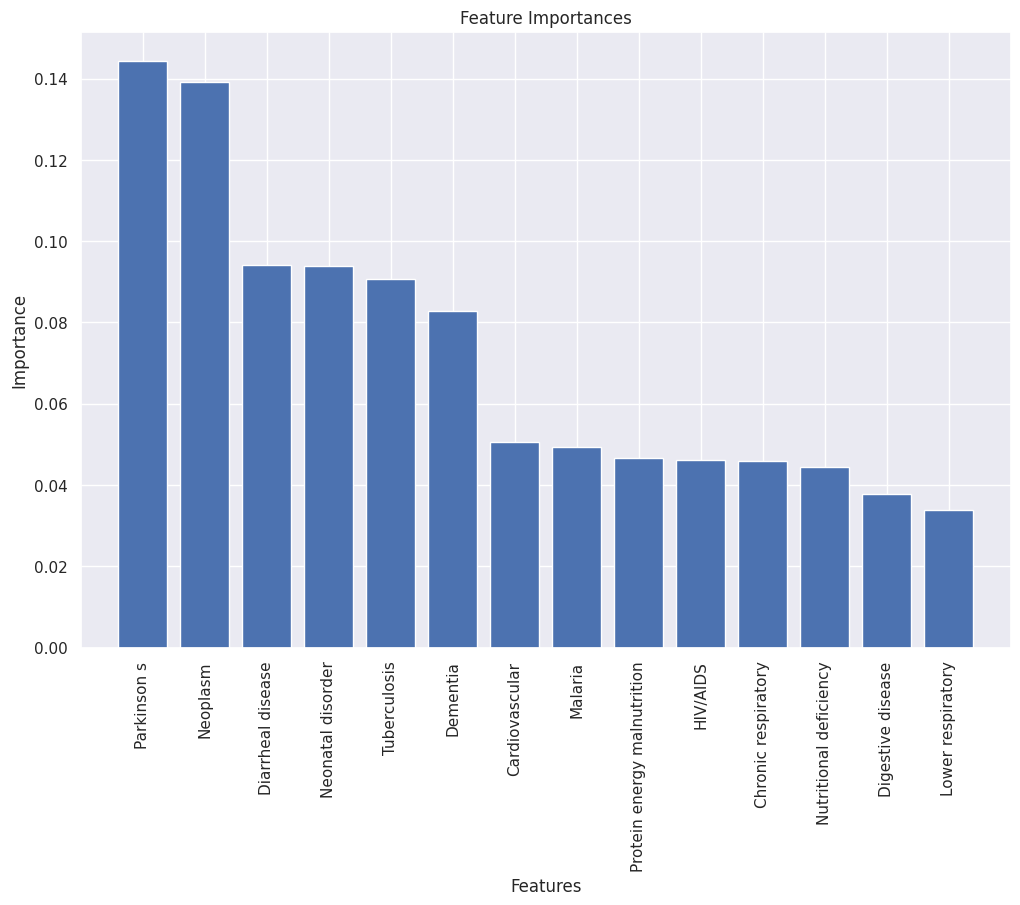

In [53]:
# Get feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [54]:
# Trying different hyperparameters
metrics = ["gini", "entropy", "log_loss"]
trees = np.linspace(1, 10, 10, dtype="int")
max_depths = [5, 10, 20, 50, 100]
max_features_values = [0.2, 0.4, 0.6, 0.8, 1]
max_sample_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.]
best_results = {"score": 0}

for metric, tree, max_depth, max_feature_value, max_sample_value in \
itertools.product(metrics, trees, max_depths, max_features_values,
                   max_sample_values):
    clf = RandomForestClassifier(n_estimators=tree, criterion=metric,
                                 max_depth=max_depth, random_state=5,
                                 max_samples=max_sample_value,
                                 max_features=max_feature_value)
    clf.fit(x_train, y_train)
    y_pred_test = clf.predict(x_test)
    score = accuracy_score(y_pred_test, y_test)


    if score > best_results["score"]:
        best_results["score"] = score
        best_results["depth"] = max_depth
        best_results["trees"] = tree
        best_results["metric"] = metric
        best_results["max_samples"] = max_sample_value
        best_results["max_features"] = max_feature_value

In [55]:
print(best_results)

{'score': 0.660377358490566, 'depth': 5, 'trees': 2, 'metric': 'gini', 'max_samples': 0.3, 'max_features': 1}


Cross-Validation Scores: [0.5        0.54761905 0.45238095 0.52380952 0.35714286]
Mean Cross-Validation Score: 0.47619047619047616
Standard Deviation of Cross-Validation Scores: 0.06734350297014739
Accuracy: 0.5471698113207547
Classification Report:
              precision    recall  f1-score   support

         Low       0.40      0.46      0.43        13
      Medium       0.58      0.70      0.64        10
        High       0.50      0.38      0.43        16
   Very High       0.71      0.71      0.71        14

    accuracy                           0.55        53
   macro avg       0.55      0.56      0.55        53
weighted avg       0.55      0.55      0.54        53



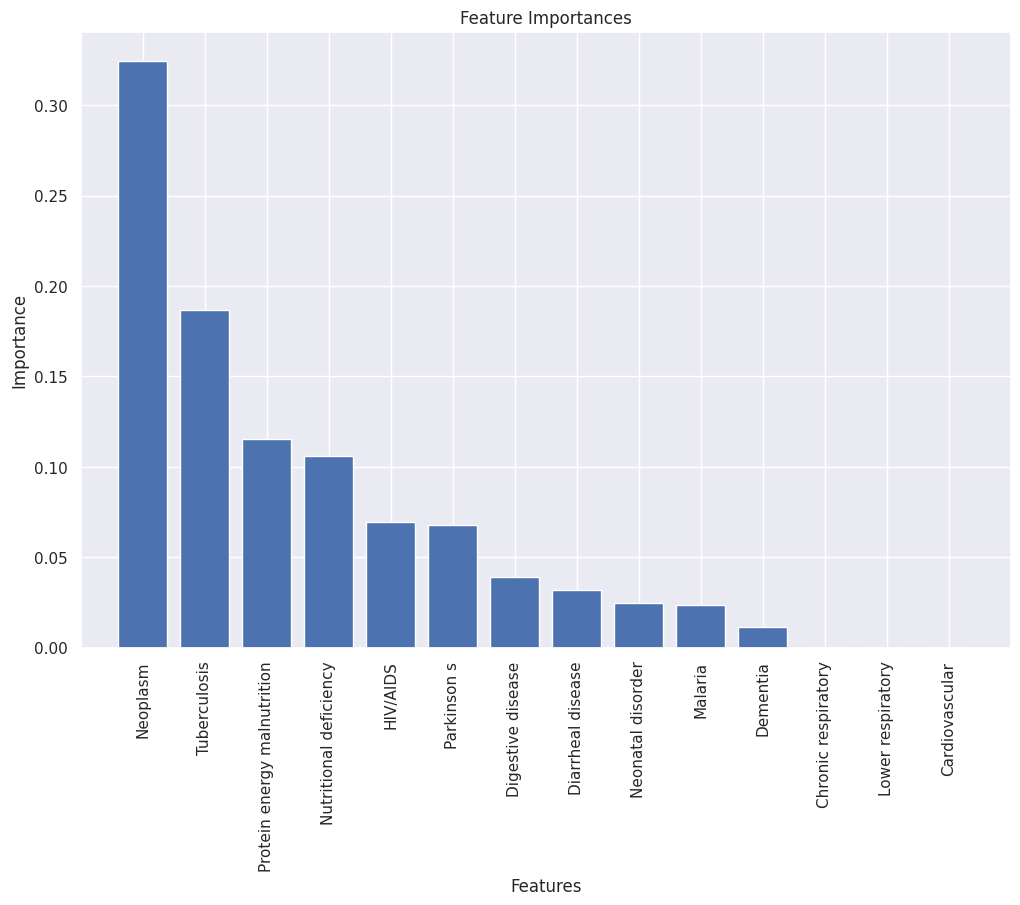

In [56]:
# Train the best Random Forest model
best_clf = RandomForestClassifier(
    n_estimators=best_results["trees"],
    criterion=best_results["metric"],
    max_depth=best_results["depth"],
    random_state=5,
    max_samples=best_results["max_samples"],
    max_features=best_results["max_features"]
)
best_clf.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5)

# Print cross-validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')
print(f'Standard Deviation of Cross-Validation Scores: {cv_scores.std()}')

# Assuming `accuracy` and `report` are defined elsewhere
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# Get feature importances
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xlim([-1, X_train.shape[1]])
plt.show()


### Predicting Air Pollution Group

In [57]:
# Initialize label encoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Air Pollution Group']

# Encode each categorical column
for col in categorical_columns:
    df_randomforest[col] = label_encoder.fit_transform(df_randomforest[col])

# Assuming 'Air Pollution Group' is the target variable and the rest are features
X = df_randomforest.drop(columns=['Country', 'GDP', "Air Pollution", "Air Pollution Group", "GDP Group"])  # Drop GDP, GDP Group, and Air Pollution Group from features
y = df_randomforest['Air Pollution Group']

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train, y_train)

print("Column names of x_train:")
print(x_train.columns)

Column names of x_train:
Index(['Dementia', 'Parkinson s', 'Nutritional deficiency', 'Malaria',
       'HIV/AIDS', 'Tuberculosis', 'Cardiovascular', 'Lower respiratory',
       'Neonatal disorder', 'Diarrheal disease', 'Neoplasm',
       'Protein energy malnutrition', 'Chronic respiratory',
       'Digestive disease'],
      dtype='object')


Accuracy: 0.39622641509433965
Classification Report:
              precision    recall  f1-score   support

         Low       0.31      0.38      0.34        13
      Medium       0.70      0.44      0.54        16
        High       0.25      0.33      0.29        12
   Very High       0.45      0.42      0.43        12

    accuracy                           0.40        53
   macro avg       0.43      0.39      0.40        53
weighted avg       0.45      0.40      0.41        53



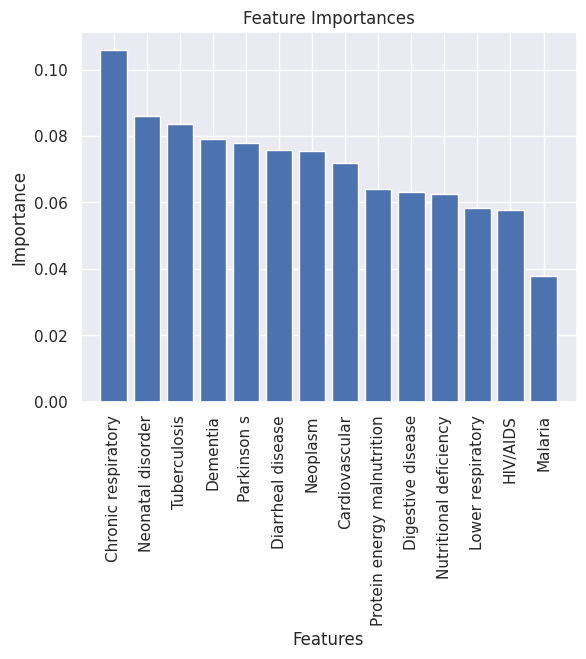

In [59]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High', 'Very High'])

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# Get feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [60]:
# Trying different hyperparameters

metrics = ["gini", "entropy", "log_loss"]
trees = np.linspace(1, 10, 10, dtype="int")
max_depths = [5, 10, 20, 50, 100]
max_features_values = [0.2, 0.4, 0.6, 0.8, 1]
max_sample_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.]
best_results = {"score": 0}

for metric, tree, max_depth, max_feature_value, max_sample_value in \
itertools.product(metrics, trees, max_depths, max_features_values,
                   max_sample_values):
    clf = RandomForestClassifier(n_estimators=tree, criterion=metric,
                                 max_depth=max_depth, random_state=5,
                                 max_samples=max_sample_value,
                                 max_features=max_feature_value)
    clf.fit(x_train, y_train)
    y_pred_test = clf.predict(x_test)
    score = accuracy_score(y_pred_test, y_test)

    # print(f"Forest with {tree} trees, {metric} metric, depth of {max_depth},"
    # f"samples of {max_sample_value}, features of {max_feature_value} - score {score}.")

    if score > best_results["score"]:
        best_results["score"] = score
        best_results["depth"] = max_depth
        best_results["trees"] = tree
        best_results["metric"] = metric
        best_results["max_samples"] = max_sample_value
        best_results["max_features"] = max_feature_value

In [61]:
print(best_results)

{'score': 0.5660377358490566, 'depth': 5, 'trees': 6, 'metric': 'gini', 'max_samples': 0.7, 'max_features': 1}


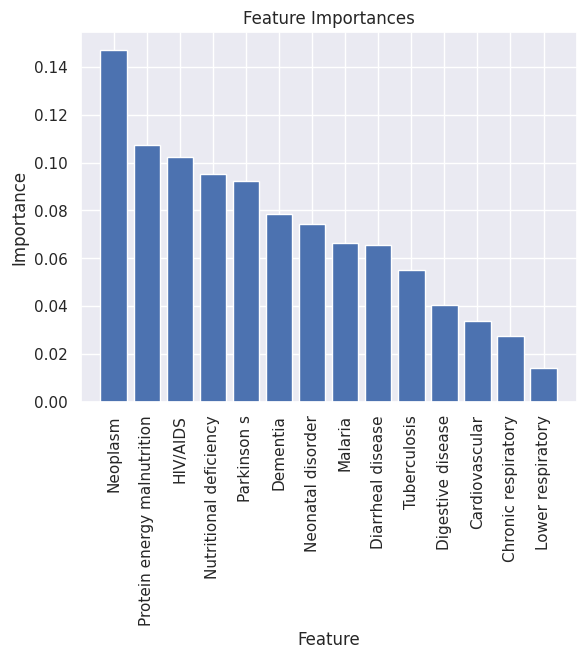

Cross-Validation Scores: [0.23809524 0.38095238 0.45238095 0.30952381 0.21428571]
Mean Cross-Validation Score: 0.319047619047619
Standard Deviation of Cross-Validation Scores: 0.08857654875113465


In [62]:
# Train the best Random Forest model
best_clf = RandomForestClassifier(n_estimators=best_results["trees"], criterion=best_results["metric"],
                                  max_depth=best_results["depth"], random_state=5,
                                  max_samples=best_results["max_samples"], max_features=best_results["max_features"])
best_clf.fit(X_train, y_train)

# Get feature importances
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5)

# Print cross-validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')
print(f'Standard Deviation of Cross-Validation Scores: {cv_scores.std()}')


# SVC classification

### predicting GDP Group

####Model with PCA application

Gamma: 0.1
Accuracy: 0.5471698113207547
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.54      0.48        13
           1       0.53      0.80      0.64        10
           2       0.36      0.25      0.30        16
           3       0.91      0.71      0.80        14

    accuracy                           0.55        53
   macro avg       0.56      0.58      0.55        53
weighted avg       0.56      0.55      0.54        53

Cross-Validation Scores: [0.57142857 0.54761905 0.61904762 0.64285714 0.57142857]
Mean Cross-Validation Score: 0.5904761904761905
Standard Deviation of Cross-Validation Scores: 0.03499271061118827
Gamma: 1
Accuracy: 0.4716981132075472
Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.38      0.32        13
           1       0.64      0.70      0.67        10
           2       0.29      0.25      0.27        16
           3       0.90  

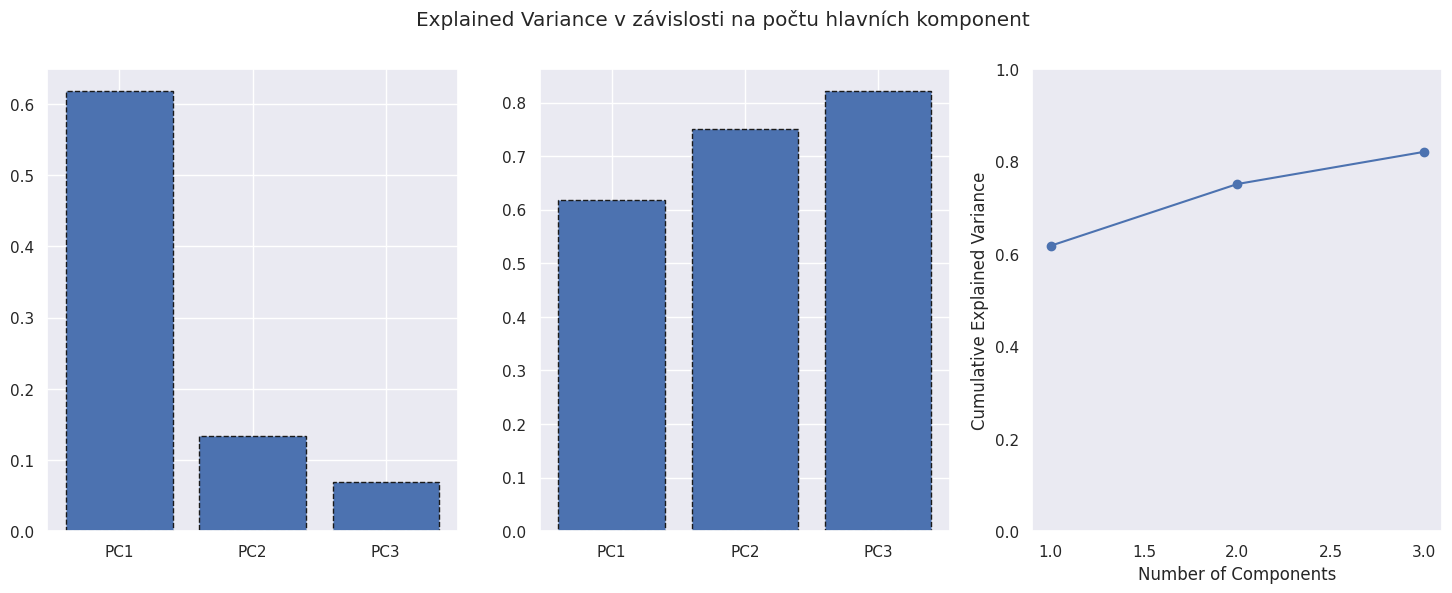

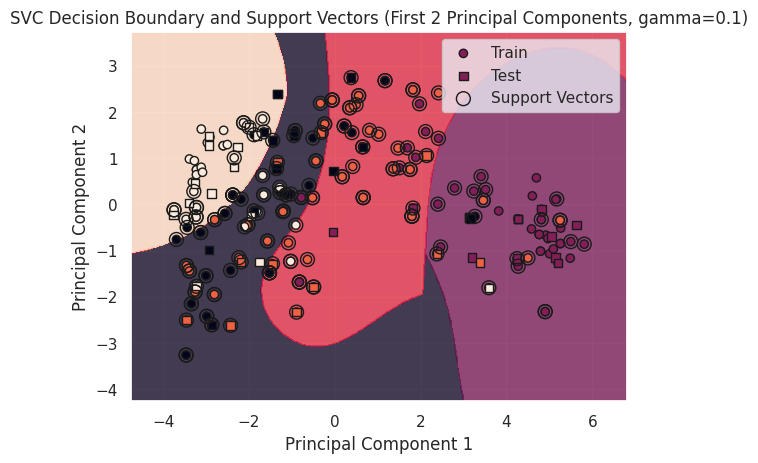

In [63]:
# Copy the original dataframe
df_pca = df_norm_reduced.drop(columns=['Country', 'GDP', 'GDP Group', 'Air Pollution', 'Air Pollution Group'])

# Scaling the features
X = df_pca.iloc[:, 1:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA analysis
pca = PCA(n_components=3)  # Using 3 components
X_pca = pca.fit_transform(X_scaled)

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical column 'GDP Group'
df_norm_reduced['GDP Group'] = label_encoder.fit_transform(df_norm_reduced['GDP Group'])

# Assuming all columns except 'GDP Group' are features
y = df_norm_reduced['GDP Group']

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=5)

# Trying different gamma values
gamma_values = [0.1, 1, 10, 100, 200]
best_score = 0
best_gamma = None

for gamma in gamma_values:
    # Initialize and train the SVC model with an RBF kernel and specific gamma
    svc = SVC(kernel='rbf', gamma=gamma)
    svc.fit(X_train, y_train)

    # Make predictions
    y_pred = svc.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Gamma: {gamma}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    # Perform cross-validation
    cv_scores = cross_val_score(svc, X_train, y_train, cv=5)  # 5-fold cross-validation

    # Report validation results
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Cross-Validation Score: {cv_scores.mean()}")
    print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std()}")

    # Check if this gamma gives the best score
    if accuracy > best_score:
        best_score = accuracy
        best_gamma = gamma

print(f"Best Gamma: {best_gamma} with accuracy: {best_score}")

# Explained variance - graph
fig_var = plt.figure(figsize=(18, 6))
fig_var.suptitle("Explained Variance v závislosti na počtu hlavních komponent")
ax_var = plt.subplot(131)
ax_cumvar = plt.subplot(132)
ax_var.bar(['PC1', 'PC2', 'PC3'], pca.explained_variance_ratio_[0:3], edgecolor="k", linestyle="--")
ax_cumvar.bar(['PC1', 'PC2', 'PC3'], np.cumsum(pca.explained_variance_ratio_)[0:3], edgecolor="k", linestyle="--")
ax_all = plt.subplot(133)
xpoints = np.arange(1, len(pca.explained_variance_ratio_) + 1)
ypoints = np.cumsum(pca.explained_variance_ratio_)
ax_all.plot(xpoints, ypoints, marker='o')
ax_all.grid()
ax_all.set_ylim([0, 1])
ax_all.set_xlabel('Number of Components')
ax_all.set_ylabel('Cumulative Explained Variance')
plt.show()

# Visualize the decision boundary using the first two principal components with the best gamma

# Train a new model using only the first two principal components for visualization
svc_2d = SVC(kernel='rbf', gamma=best_gamma)
svc_2d.fit(X_train[:, :2], y_train)

# Create a mesh to plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z = svc_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Test')
plt.scatter(svc_2d.support_vectors_[:, 0], svc_2d.support_vectors_[:, 1], facecolors='none', edgecolors='k', s=100, label='Support Vectors')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'SVC Decision Boundary and Support Vectors (First 2 Principal Components, gamma={best_gamma})')
plt.legend()
plt.show()



Evaluating SVC with gamma=0.1
Gamma: 0.1
Accuracy: 0.5471698113207547
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.54      0.48        13
           1       0.53      0.80      0.64        10
           2       0.36      0.25      0.30        16
           3       0.91      0.71      0.80        14

    accuracy                           0.55        53
   macro avg       0.56      0.58      0.55        53
weighted avg       0.56      0.55      0.54        53

Cross-Validation Scores: [0.57142857 0.54761905 0.61904762 0.64285714 0.57142857]
Mean Cross-Validation Score: 0.5904761904761905
Standard Deviation of Cross-Validation Scores: 0.03499271061118827
Evaluating SVC with gamma=1
Gamma: 1
Accuracy: 0.4716981132075472
Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.38      0.32        13
           1       0.64      0.70      0.67        10
           2       0.

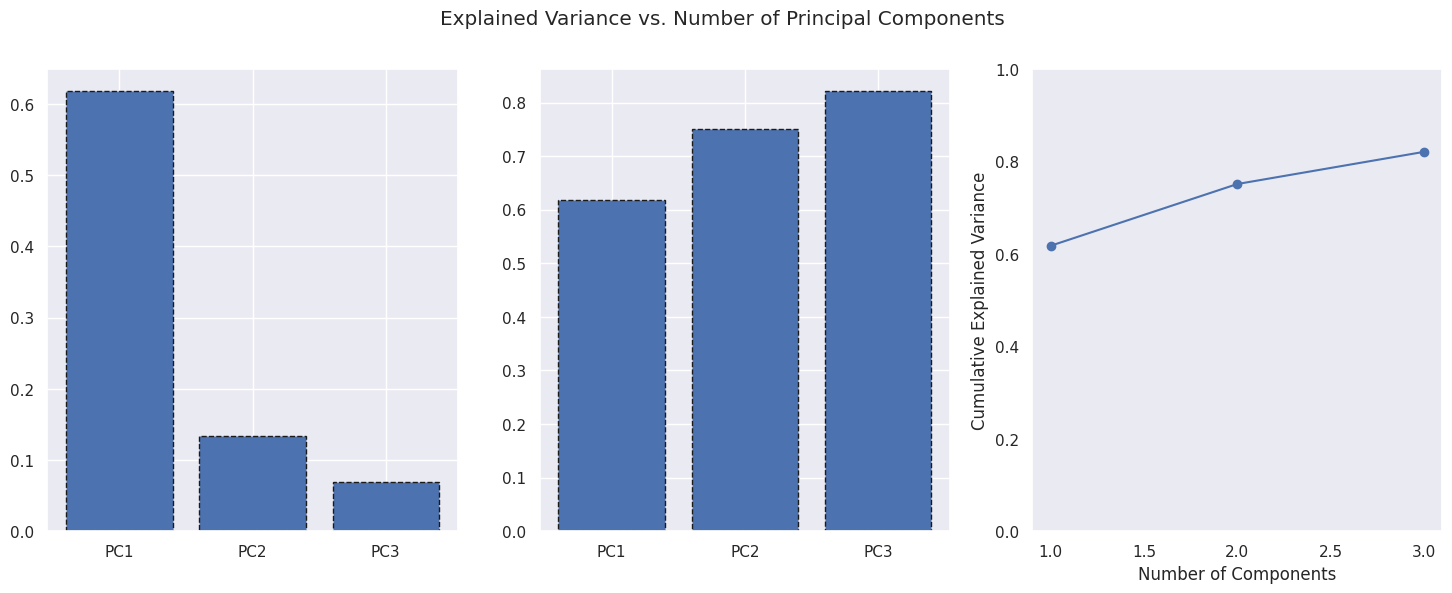

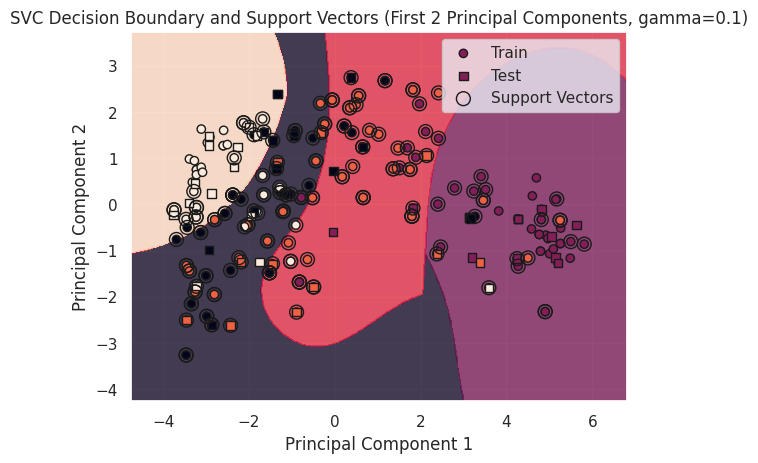

Hyperparameters used for the final model:
- Kernel: RBF
- Gamma: 0.1


In [64]:
# Copy the original dataframe
df_pca = df_norm_reduced.drop(columns=['Country', 'GDP', 'GDP Group', 'Air Pollution', 'Air Pollution Group'])

# Scaling the features
X = df_pca.iloc[:, 1:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA analysis
pca = PCA(n_components=3)  # Using 3 components
X_pca = pca.fit_transform(X_scaled)

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical column 'GDP Group'
df_norm_reduced['GDP Group'] = label_encoder.fit_transform(df_norm_reduced['GDP Group'])

# Assuming all columns except 'GDP Group' are features
y = df_norm_reduced['GDP Group']

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=5)

# Trying different gamma values
gamma_values = [0.1, 1, 10, 100, 200]
best_score = 0
best_gamma = None

for gamma in gamma_values:
    print(f"Evaluating SVC with gamma={gamma}")

    # Initialize and train the SVC model with an RBF kernel and specific gamma
    svc = SVC(kernel='rbf', gamma=gamma)
    svc.fit(X_train, y_train)

    # Make predictions
    y_pred = svc.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Gamma: {gamma}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    # Perform cross-validation
    cv_scores = cross_val_score(svc, X_train, y_train, cv=5)  # 5-fold cross-validation

    # Report validation results
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Cross-Validation Score: {cv_scores.mean()}")
    print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std()}")

    # Check if this gamma gives the best score
    if accuracy > best_score:
        best_score = accuracy
        best_gamma = gamma

print(f"Best Gamma: {best_gamma} with accuracy: {best_score}")

# Explained variance - graph
fig_var = plt.figure(figsize=(18, 6))
fig_var.suptitle("Explained Variance vs. Number of Principal Components")
ax_var = plt.subplot(131)
ax_cumvar = plt.subplot(132)
ax_var.bar(['PC1', 'PC2', 'PC3'], pca.explained_variance_ratio_[0:3], edgecolor="k", linestyle="--")
ax_cumvar.bar(['PC1', 'PC2', 'PC3'], np.cumsum(pca.explained_variance_ratio_)[0:3], edgecolor="k", linestyle="--")
ax_all = plt.subplot(133)
xpoints = np.arange(1, len(pca.explained_variance_ratio_) + 1)
ypoints = np.cumsum(pca.explained_variance_ratio_)
ax_all.plot(xpoints, ypoints, marker='o')
ax_all.grid()
ax_all.set_ylim([0, 1])
ax_all.set_xlabel('Number of Components')
ax_all.set_ylabel('Cumulative Explained Variance')
plt.show()

# Visualize the decision boundary using the first two principal components with the best gamma
svc_2d = SVC(kernel='rbf', gamma=best_gamma)
svc_2d.fit(X_train[:, :2], y_train)

# Create a mesh to plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z = svc_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Test')
plt.scatter(svc_2d.support_vectors_[:, 0], svc_2d.support_vectors_[:, 1], facecolors='none', edgecolors='k', s=100, label='Support Vectors')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'SVC Decision Boundary and Support Vectors (First 2 Principal Components, gamma={best_gamma})')
plt.legend()
plt.show()

print(f"Hyperparameters used for the final model:\n- Kernel: RBF\n- Gamma: {best_gamma}")


#### Model OvA & OvO with visualization

One-vs-All SVM
Accuracy: 0.49056603773584906
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.15      0.20        13
           1       0.50      0.80      0.62        10
           2       0.45      0.31      0.37        16
           3       0.58      0.79      0.67        14

    accuracy                           0.49        53
   macro avg       0.45      0.51      0.46        53
weighted avg       0.45      0.49      0.45        53

Cross-Validation Scores: [0.5        0.45238095 0.47619048 0.57142857 0.47619048]
Mean Cross-Validation Score: 0.49523809523809514
Standard Deviation of Cross-Validation Scores: 0.04096345365258393

One-vs-One SVM
Accuracy: 0.5660377358490566
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.46      0.48        13
           1       0.50      0.80      0.62        10
           2       0.50      0.38      0.43        16
           3

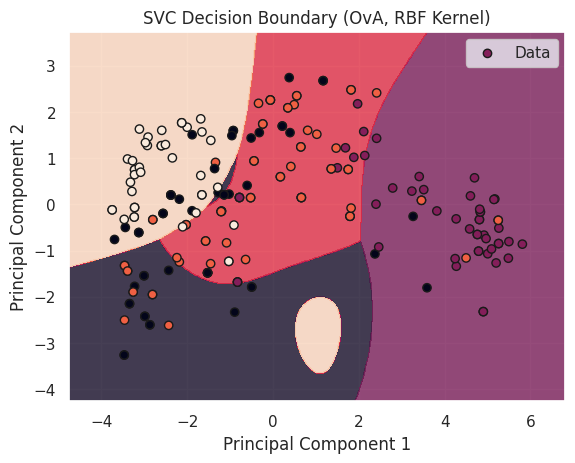

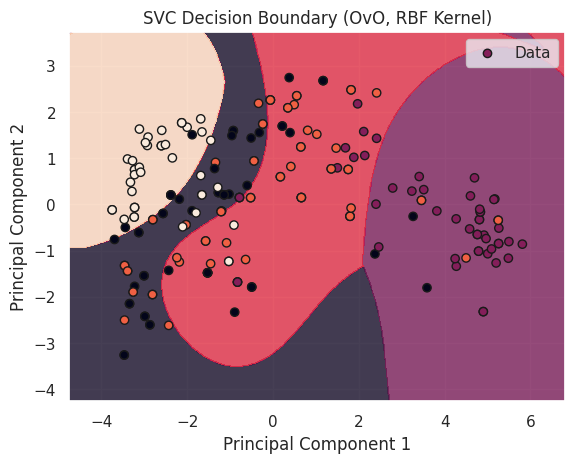

In [65]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# Removing unnecessary columns
df_pca = df_norm_reduced.drop(columns=['Country', 'GDP', 'GDP Group', 'Air Pollution', 'Air Pollution Group'])

# Scaling the features
X = df_pca.iloc[:, 1:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA analysis
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Initialize label encoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['GDP Group']

# Encode each categorical column
for col in categorical_columns:
    df_norm_reduced[col] = label_encoder.fit_transform(df_norm_reduced[col])

# Assuming all columns except 'GDP Group' are features
y = df_norm_reduced['GDP Group']

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=5)

# Initialize SVC model with an RBF kernel
svc_rbf = SVC(kernel='rbf')

# One-vs-All approach
ova_svc = OneVsRestClassifier(svc_rbf)
ova_svc.fit(X_train, y_train)

# One-vs-One approach
ovo_svc = OneVsOneClassifier(svc_rbf)
ovo_svc.fit(X_train, y_train)

# Make predictions for One-vs-All
y_pred_ova = ova_svc.predict(X_test)
accuracy_ova = accuracy_score(y_test, y_pred_ova)
report_ova = classification_report(y_test, y_pred_ova)
cv_scores_ova = cross_val_score(ova_svc, X_train, y_train, cv=5)

# Make predictions for One-vs-One
y_pred_ovo = ovo_svc.predict(X_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
report_ovo = classification_report(y_test, y_pred_ovo)
cv_scores_ovo = cross_val_score(ovo_svc, X_train, y_train, cv=5)

print("One-vs-All SVM")
print("Accuracy:", accuracy_ova)
print("Classification Report:\n", report_ova)
print("Cross-Validation Scores:", cv_scores_ova)
print("Mean Cross-Validation Score:", cv_scores_ova.mean())
print("Standard Deviation of Cross-Validation Scores:", cv_scores_ova.std())

print("\nOne-vs-One SVM")
print("Accuracy:", accuracy_ovo)
print("Classification Report:\n", report_ovo)
print("Cross-Validation Scores:", cv_scores_ovo)
print("Mean Cross-Validation Score:", cv_scores_ovo.mean())
print("Standard Deviation of Cross-Validation Scores:", cv_scores_ovo.std())

# Visualize the decision boundary using the first two principal components
def plot_decision_boundary(clf, X, y, title):
    # Create a mesh to plot the decision boundary
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', label='Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot decision boundary for One-vs-All SVM
plot_decision_boundary(ova_svc, X_train, y_train, 'SVC Decision Boundary (OvA, RBF Kernel)')

# Plot decision boundary for One-vs-One SVM
plot_decision_boundary(ovo_svc, X_train, y_train, 'SVC Decision Boundary (OvO, RBF Kernel)')


####Model without PCA

In [66]:
# Copy the original dataframe
df_svc = df_final_reduced.copy()

# Initialize label encoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['GDP Group', 'Air Pollution Group']

# Encode each categorical column
for col in categorical_columns:
    df_svc[col] = label_encoder.fit_transform(df_svc[col])

# Assuming all columns except 'GDP Group' are features
X = df_svc.drop(columns=['Country','GDP','Air Pollution', 'GDP Group', 'Air Pollution Group'])
y = df_svc['GDP Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVC model with an RBF kernel
svc = SVC(kernel='rbf')
svc.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svc.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svc, X_train, y_train, cv=5)

# Print cross-validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')
print(f'Standard Deviation of Cross-Validation Scores: {cv_scores.std()}')

Accuracy: 0.5849056603773585
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.62      0.53        13
           1       0.58      0.70      0.64        10
           2       0.58      0.44      0.50        16
           3       0.75      0.64      0.69        14

    accuracy                           0.58        53
   macro avg       0.60      0.60      0.59        53
weighted avg       0.60      0.58      0.58        53

Cross-Validation Scores: [0.69047619 0.52380952 0.52380952 0.61904762 0.57142857]
Mean Cross-Validation Score: 0.5857142857142857
Standard Deviation of Cross-Validation Scores: 0.06317380553057904


### Predicting Air Pollution Group

In [67]:
# Select features and target
X = df_svc.drop(columns=['Air Pollution', 'Air Pollution Group', 'GDP', 'GDP Group', 'Country'])
y = df_svc['Air Pollution Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVC model with RBF kernel
svc = SVC(kernel='rbf')
svc.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svc.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)

# Print cross-validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')
print(f'Standard Deviation of Cross-Validation Scores: {cv_scores.std()}')

Accuracy: 0.4528301886792453
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.38      0.33        13
           1       0.75      0.56      0.64        16
           2       0.33      0.25      0.29        12
           3       0.47      0.58      0.52        12

    accuracy                           0.45        53
   macro avg       0.46      0.45      0.45        53
weighted avg       0.48      0.45      0.46        53

Cross-Validation Scores: [0.28571429 0.4047619  0.47619048 0.38095238 0.35714286]
Mean Cross-Validation Score: 0.38095238095238093
Standard Deviation of Cross-Validation Scores: 0.06208764195431094


# Clustering

In [68]:
# @title
df_cluster = df_final_reduced.copy()
columns_to_drop = [17,18]
df_cluster.drop(df_cluster.columns[columns_to_drop], axis=1, inplace=True)

df_unscaled = df_cluster.copy()

df_cluster.head()

,Country,GDP,Air Pollution,Dementia,Parkinson s,Nutritional deficiency,Malaria,HIV/AIDS,Tuberculosis,Cardiovascular,Lower respiratory,Neonatal disorder,Diarrheal disease,Neoplasm,Protein energy malnutrition,Chronic respiratory,Digestive disease
0,Afghanistan,574.572633,61.616510,1.070649,0.333354,1.101591,0.192318,0.143525,2.706286,37.542343,14.584954,16.074093,3.956159,12.233687,1.076061,4.617574,4.367407
1,Albania,4297.336695,19.919271,4.058626,1.121001,0.028098,0.000000,0.011239,0.061028,61.836118,2.200108,1.348920,0.039338,22.780832,0.022479,3.824319,2.667893
2,Albania,4297.336695,19.919271,4.058626,1.121001,0.028098,0.000000,0.011239,0.061028,61.836118,2.200108,1.348920,0.039338,22.780832,0.022479,3.824319,2.667893
3,Algeria,4844.421258,35.684048,2.938192,0.743877,0.086927,0.000000,0.240018,0.351549,59.753651,3.973673,8.402917,0.422377,14.327029,0.072944,4.691503,3.995342
4,Algeria,4844.421258,35.684048,2.938192,0.743877,0.086927,0.000000,0.240018,0.351549,59.753651,3.973673,8.402917,0.422377,14.327029,0.072944,4.691503,3.995342


In [69]:
columns = list(df_cluster.columns)
columns.remove("Country")

minmax = MinMaxScaler((0, 1))
df_cluster[columns] = minmax.fit_transform(df_cluster[columns])
X = df_cluster[columns].to_numpy()
y = df_cluster["Country"].to_numpy()

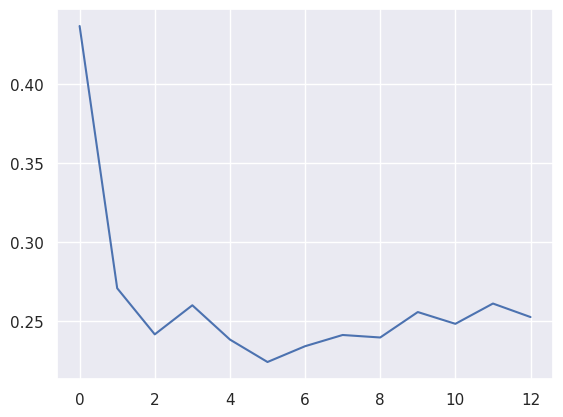

In [70]:
# Finding optimal number of clusters based on silhouette score

n_cluster = list(range(2, 15))
sc_list = []
for n in n_cluster:
    kmeans = KMeans(n_clusters=n, n_init='auto', random_state=42).fit(X)
    # Silhouette score
    sc_list.append(sc(X, kmeans.labels_, metric="euclidean"))

plt.plot(sc_list) # optimal number of clusters is 2

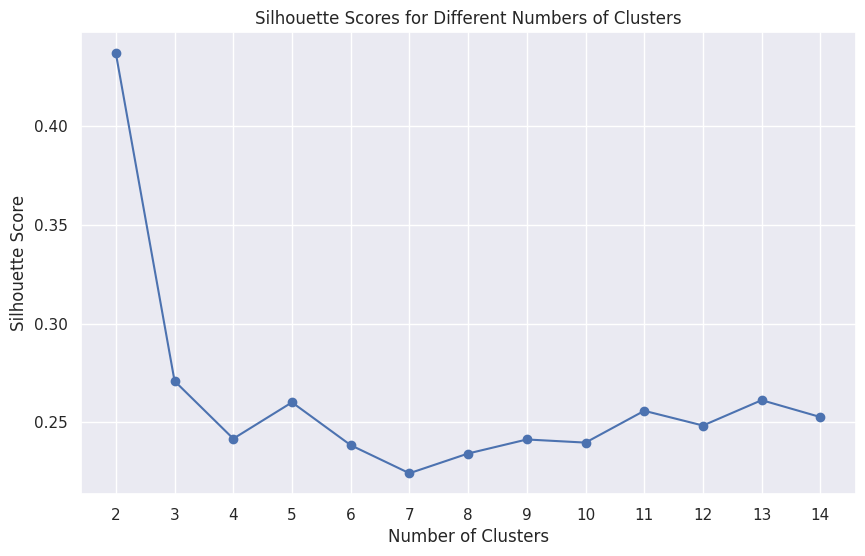

In [71]:
# Normalize the data
columns = list(df_cluster.columns)
columns.remove("Country")

minmax = MinMaxScaler((0, 1))
df_cluster[columns] = minmax.fit_transform(df_cluster[columns])
X = df_cluster[columns].to_numpy()
y = df_cluster["Country"].to_numpy()  # Target variable for reference

# Compute silhouette scores for different numbers of clusters
n_cluster = list(range(2, 15))
sc_list = []
for n in n_cluster:
    kmeans = KMeans(n_clusters=n, n_init='auto', random_state=42).fit(X)
    sc_list.append(sc(X, kmeans.labels_, metric="euclidean"))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(n_cluster, sc_list, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.xticks(n_cluster)  # Optional: show all numbers of clusters on x-axis
plt.show()

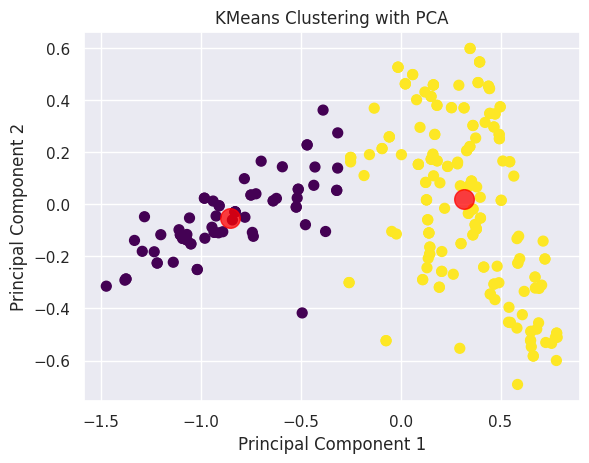

In [72]:
kmeans = KMeans(n_clusters=n_cluster[0], n_init='auto', random_state=42)
#kmeans = KMeans(n_clusters=n_cluster[1], n_init='auto', random_state=42) # trying 3 clusters
y_kmeans = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA')
plt.show()



In [73]:
labels = kmeans.labels_
df = pd.DataFrame(df_unscaled[list(df_unscaled.columns)]) # using unscaled data for easier interpretation
df['Cluster'] = labels
df.head()

cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
#cluster_2 = df[df['Cluster'] == 2]

cluster_1.head()



,Country,GDP,Air Pollution,Dementia,Parkinson s,Nutritional deficiency,Malaria,HIV/AIDS,Tuberculosis,Cardiovascular,Lower respiratory,Neonatal disorder,Diarrheal disease,Neoplasm,Protein energy malnutrition,Chronic respiratory,Digestive disease,Cluster
1,Albania,4297.336695,19.919271,4.058626,1.121001,0.028098,0.0,0.011239,0.061028,61.836118,2.200108,1.348920,0.039338,22.780832,0.022479,3.824319,2.667893,1
2,Albania,4297.336695,19.919271,4.058626,1.121001,0.028098,0.0,0.011239,0.061028,61.836118,2.200108,1.348920,0.039338,22.780832,0.022479,3.824319,2.667893,1
3,Algeria,4844.421258,35.684048,2.938192,0.743877,0.086927,0.0,0.240018,0.351549,59.753651,3.973673,8.402917,0.422377,14.327029,0.072944,4.691503,3.995342,1
4,Algeria,4844.421258,35.684048,2.938192,0.743877,0.086927,0.0,0.240018,0.351549,59.753651,3.973673,8.402917,0.422377,14.327029,0.072944,4.691503,3.995342,1
5,American Samoa,11251.779412,13.765959,2.626306,1.239224,0.826149,0.0,0.413075,0.413075,46.374245,4.641478,2.071559,1.239224,25.246058,0.826149,8.822425,5.261033,1


In [74]:
cluster_0.describe()

,GDP,Air Pollution,Dementia,Parkinson s,Nutritional deficiency,Malaria,HIV/AIDS,Tuberculosis,Cardiovascular,Lower respiratory,Neonatal disorder,Diarrheal disease,Neoplasm,Protein energy malnutrition,Chronic respiratory,Digestive disease,Cluster
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0
mean,2268.620328,36.822110,0.943952,0.260756,2.110258,7.663945,12.466729,6.444396,19.661585,10.742143,11.092596,8.424974,8.946246,2.019631,4.281989,4.940799,0.0
std,3019.227718,18.279665,0.447427,0.121966,1.563906,7.424688,12.580764,2.840237,8.646795,3.104230,4.095059,4.807489,3.105812,1.549060,3.808929,1.855787,0.0
min,260.993388,11.942435,0.246072,0.083089,0.498208,0.000000,0.000000,0.757949,9.440900,4.473837,4.491501,2.165605,3.791984,0.392471,1.551376,2.579265,0.0
25%,726.737400,23.931062,0.651831,0.175257,0.861476,0.856248,2.908082,4.597019,13.701204,8.798478,8.233271,4.510227,6.768810,0.742469,2.331037,3.698307,0.0
50%,1294.586916,31.151475,0.809719,0.224620,1.499166,5.616643,8.005651,6.200961,15.849454,10.600017,10.647261,7.692038,8.745768,1.445318,3.049318,4.602010,0.0
75%,2188.319170,43.307114,1.169777,0.334839,2.632217,14.135756,17.969954,7.730549,23.097115,13.558584,13.439432,11.474613,10.770529,2.553680,4.058632,5.601370,0.0
max,16328.509797,98.248205,2.580515,0.567938,7.057554,25.027197,46.186276,14.827670,43.225643,16.844575,23.971334,26.472184,19.472281,6.900776,23.899022,13.132826,0.0


In [75]:
cluster_1.describe()

,GDP,Air Pollution,Dementia,Parkinson s,Nutritional deficiency,Malaria,HIV/AIDS,Tuberculosis,Cardiovascular,Lower respiratory,Neonatal disorder,Diarrheal disease,Neoplasm,Protein energy malnutrition,Chronic respiratory,Digestive disease,Cluster
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.0
mean,17078.552525,22.690638,3.898191,0.945360,0.355795,0.115466,0.944786,0.817719,47.381971,5.027594,2.518768,0.785661,25.272840,0.315074,5.570047,6.050730,1.0
std,20507.859646,13.373750,1.970916,0.337534,0.422232,0.595480,1.317278,1.056760,11.168802,3.050581,2.540603,1.130068,8.063048,0.400016,2.825380,2.398247,0.0
min,919.101107,6.455177,0.441299,0.234626,0.000000,0.000000,0.006448,0.000000,23.252426,0.846223,0.057195,0.000000,11.456588,0.000000,1.390130,2.518996,1.0
25%,4958.895991,13.261244,2.513424,0.742998,0.045581,0.000000,0.074203,0.127653,37.784071,3.203563,0.329707,0.162105,18.227750,0.024450,3.375130,4.216587,1.0
50%,7591.102557,20.548552,3.637727,0.880944,0.159256,0.000000,0.383709,0.424198,46.662772,4.602088,1.820163,0.374971,25.105745,0.119906,5.077573,5.601894,1.0
75%,18982.279218,26.468753,5.076369,1.158443,0.508699,0.000113,1.267833,1.109704,57.010706,6.194611,4.069497,1.013040,31.256865,0.462118,7.501788,7.237399,1.0
max,113485.740252,87.022488,12.237734,1.934963,1.832344,4.440435,7.614717,6.783415,71.369922,16.195464,10.735406,6.276576,42.682912,1.677499,16.261795,14.877034,1.0


In [76]:
#cluster_2.describe()